# GRU

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/My Drive/without_normalize_nasdaq_and_sentiment_analysis.csv'

In [4]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 데이터 확인
print(df.head())  # 데이터의 처음 5행을 출력

          day         Open          High          Low         Close  \
0  2023-12-26  15028.69043  15101.179688  15024.05957  15074.570312   
1  2023-12-26  15028.69043  15101.179688  15024.05957  15074.570312   
2  2023-12-26  15028.69043  15101.179688  15024.05957  15074.570312   
3  2023-12-26  15028.69043  15101.179688  15024.05957  15074.570312   
4  2023-12-26  15028.69043  15101.179688  15024.05957  15074.570312   

       Volume     Adj Close  vader_sentiment  roberta_sentiment  \
0  6120600000  15074.570312               -1                 -1   
1  6120600000  15074.570312                0                  1   
2  6120600000  15074.570312                1                  1   
3  6120600000  15074.570312                1                 -1   
4  6120600000  15074.570312                0                 -1   

   total_sentiment  
0             -1.0  
1              0.5  
2              1.0  
3              0.0  
4             -0.5  


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

In [6]:
# 데이터 정규화
features_to_scale = ['Open', 'High', 'Low', 'Volume', 'Close'] # nasdaq 지수만 정규화

scaler = MinMaxScaler(feature_range=(-1,1))
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

print(df.head(10))

          day      Open      High       Low     Close    Volume     Adj Close  \
0  2023-12-26 -0.811721 -0.829376 -0.802253 -0.800738 -0.414346  15074.570312   
1  2023-12-26 -0.811721 -0.829376 -0.802253 -0.800738 -0.414346  15074.570312   
2  2023-12-26 -0.811721 -0.829376 -0.802253 -0.800738 -0.414346  15074.570312   
3  2023-12-26 -0.811721 -0.829376 -0.802253 -0.800738 -0.414346  15074.570312   
4  2023-12-26 -0.811721 -0.829376 -0.802253 -0.800738 -0.414346  15074.570312   
5  2023-12-26 -0.811721 -0.829376 -0.802253 -0.800738 -0.414346  15074.570312   
6  2023-12-26 -0.811721 -0.829376 -0.802253 -0.800738 -0.414346  15074.570312   
7  2023-12-26 -0.811721 -0.829376 -0.802253 -0.800738 -0.414346  15074.570312   
8  2023-12-26 -0.811721 -0.829376 -0.802253 -0.800738 -0.414346  15074.570312   
9  2023-12-26 -0.811721 -0.829376 -0.802253 -0.800738 -0.414346  15074.570312   

   vader_sentiment  roberta_sentiment  total_sentiment  
0               -1                 -1             -

In [7]:
df.drop(columns=['Adj Close'], inplace=True)

In [8]:
df

,day,Open,High,Low,Close,Volume,vader_sentiment,roberta_sentiment,total_sentiment
0,2023-12-26,-0.811721,-0.829376,-0.802253,-0.800738,-0.414346,-1,-1,-1.0
1,2023-12-26,-0.811721,-0.829376,-0.802253,-0.800738,-0.414346,0,1,0.5
2,2023-12-26,-0.811721,-0.829376,-0.802253,-0.800738,-0.414346,1,1,1.0
3,2023-12-26,-0.811721,-0.829376,-0.802253,-0.800738,-0.414346,1,-1,0.0
4,2023-12-26,-0.811721,-0.829376,-0.802253,-0.800738,-0.414346,0,-1,-0.5
...,...,...,...,...,...,...,...,...,...
5578,2024-12-24,0.894388,0.937825,0.930897,0.949587,-0.750511,0,0,0.0
5579,2024-12-24,0.894388,0.937825,0.930897,0.949587,-0.750511,-1,-1,-1.0
5580,2024-12-24,0.894388,0.937825,0.930897,0.949587,-0.750511,1,1,1.0
5581,2024-12-24,0.894388,0.937825,0.930897,0.949587,-0.750511,1,1,1.0


from matplotlib import pyplot as plt
df['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Close', y='Volume', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [8]:
# 시계열 데이터 생성 함수
# df의 day 열 고려
def create_sequences(data, labels, days, sequence_length):
    X, y, day_seq = [], [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(labels[i + sequence_length])
        day_seq.append(days[i+sequence_length]) # 해당 시퀀스의 마지막 날 추가
    return np.array(X), np.array(y), np.array(day_seq)

## keras tuner

In [ ]:
pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 11.9 MB/s eta 0:00:00


In [ ]:
import keras_tuner
import keras

In [ ]:
# GRU model

def build_model(hp):
  model = keras.Sequential()

  # 첫 번째 GRU layer unit 조정
  """model = Sequential([
      GRU(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
      Dropout(0.2),
      GRU(64),
      Dropout(0.2),
      Dense(1)])"""

  units_1 = hp.Int('units_1', min_value = 32, max_value = 128, step = 32)
  model.add(GRU(units_1, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
  model.add(Dropout(0.2))

  # 두 번째 GRU layer unit 조정
  units_2 = hp.Int('units_2', min_value = 32, max_value = 128, step = 32)
  model.add(GRU(units_2))
  model.add(Dropout(0.2))

  # 출력 layer
  model.add(Dense(1))

  # learning rate
  learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])

  # optimizer
  optimizer = hp.Choice('optimizer', values = ['adam', 'sgd'])
  if optimizer_name == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate)

  # 모델 컴파일
  model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

  return model

In [ ]:
from keras_tuner import Hyperband

tuner = Hyperband(
    build_model,
    objective='val_mae',
    factor=3, # 성능이 좋지 않은 조합을 얼마나 빨리 중단할지
    max_epochs=20, # 각 하이퍼파라미터 조합에 대해 최대 20 에폭 동안 학습
    overwrite=True
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### nasdaq 지수만 활용하여 예측

In [76]:
nasdaq = ['Open', 'High', 'Low', 'Volume']

In [77]:
# 시퀀스 길이 설정
sequence_length = 60 # 과거 30일 데이터 사용하여 다음 날의 값 예측
X, y, day_seq = create_sequences(df[nasdaq].values, df['Close'].values, df['day'].values, sequence_length)

# 데이터셋 분리: 훈련 + 검증 데이터와 테스트 데이터로 나누기
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# 훈련 데이터와 검증 데이터로 다시 분리
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42, shuffle=False)

# day_seq도 동일하게 분리
day_train_val, day_test = train_test_split(df['day'].values[sequence_length:], test_size=0.2, random_state=42, shuffle=False)
day_train, day_val = train_test_split(day_train_val, test_size=0.2, random_state=42, shuffle=False)

In [78]:
from keras.callbacks import EarlyStopping

# 조기 종료 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# 하이퍼파라미터 탐색
tuner.search(X_train, y_train,
             epochs=20,
             validation_data=(X_test, y_test),
             callbacks=[early_stopping],
             batch_size=32)

# 최적의 하이퍼파라미터 가져오기
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:")
for hp, value in best_hyperparameters.values.items():
    print(f"{hp}: {value}")

# GRU 모델 -> 최적의 파라미터로 수정
model = Sequential([
    GRU(best_hyperparameters.get('units_1'), return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    GRU(best_hyperparameters.get('units_2')),
    Dropout(0.2),
    Dense(1)
])

# 모델 컴파일
optimizer_name = best_hyperparameters.get('optimizer')
learning_rate = best_hyperparameters.get('learning_rate')

if optimizer_name == 'adam':
    optimizer = 'adam'
else:
    optimizer = 'sgd'

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# 조기 종료 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# 모델 학습
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

# 모델 평가
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.3f}, Test MAE: {test_mae:.3f}")

최적의 하이퍼파라미터:
units_1: 128
units_2: 128
learning_rate: 0.0001
optimizer: sgd
tuner/epochs: 7
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0671 - mae: 0.1909 - val_loss: 0.0085 - val_mae: 0.0819
Epoch 2/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0068 - mae: 0.0636 - val_loss: 0.0022 - val_mae: 0.0352
Epoch 3/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0056 - mae: 0.0586 - val_loss: 0.0021 - val_mae: 0.0348
Epoch 4/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0049 - mae: 0.0537 - val_loss: 0.0021 - val_mae: 0.0347
Epoch 5/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0049 - mae: 0.0534 - val_loss: 0.0021 - val_mae: 0.0341
Epoch 6/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0045 - mae: 0.0517 - val_loss: 0.0021 - val_mae: 0.0338
Epoch 7/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0048 - mae: 0.0532 - val_loss: 0.0021 - val_mae: 0.0338
Epoch 8/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0041 - mae: 0.0491 - val_loss: 0.0023 - val_mae: 0.0353
Epoch 9/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


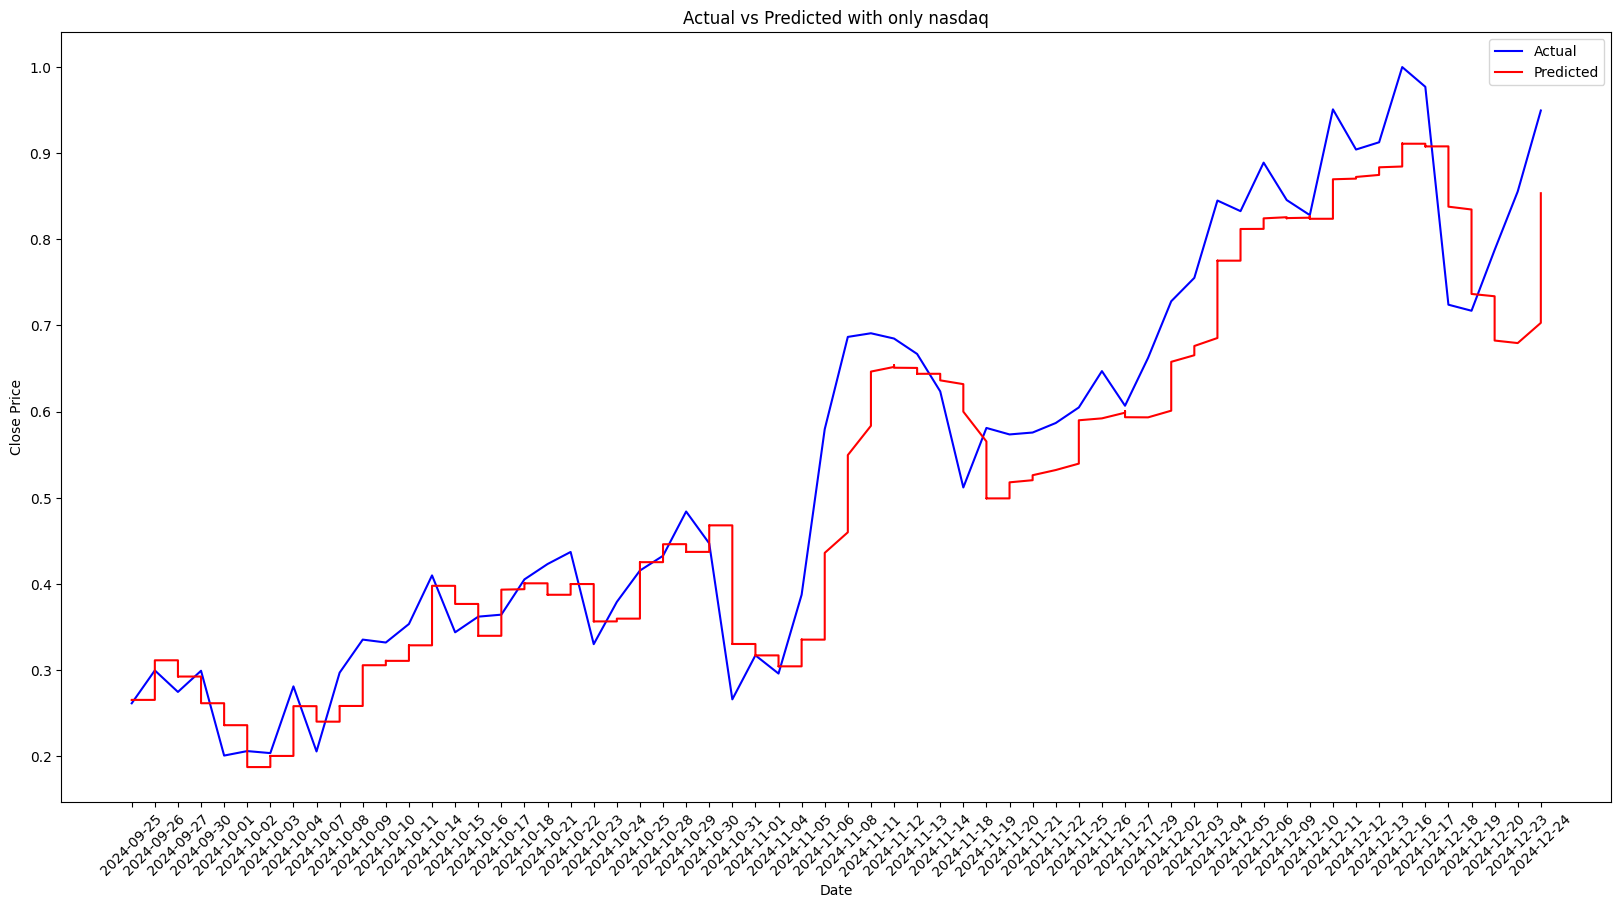

In [79]:
import matplotlib.pyplot as plt

# 예측 수행
y_pred = model.predict(X_test)

# 예측 결과와 실제 결과를 데이터프레임으로 변환
results = pd.DataFrame({
    'Date': day_test,  # 날짜 정보
    'Actual': y_test,
    'Predicted': y_pred.flatten()  # 예측 결과
})

# 시각화
plt.figure(figsize=(20, 10))
plt.plot(results['Date'], results['Actual'], label='Actual', color='blue')
plt.plot(results['Date'], results['Predicted'], label='Predicted', color='red')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted with only nasdaq')
plt.legend()
plt.show()

### vader_sentiment도 고려

In [59]:
vader = ['Open', 'High', 'Low', 'Volume', 'vader_sentiment']

In [60]:
X, y, day_seq = create_sequences(df[vader].values, df['Close'].values, df['day'].values, sequence_length)

# 데이터셋 분리: 훈련 + 검증 데이터와 테스트 데이터로 나누기
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# 훈련 데이터와 검증 데이터로 다시 분리
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42, shuffle=False)

# day_seq도 동일하게 분리
day_train_val, day_test = train_test_split(df['day'].values[sequence_length:], test_size=0.2, random_state=42, shuffle=False)
day_train, day_val = train_test_split(day_train_val, test_size=0.2, random_state=42, shuffle=False)

In [62]:
from keras.callbacks import EarlyStopping

# 조기 종료 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# 하이퍼파라미터 탐색
tuner.search(X_train, y_train,
             epochs=20,
             validation_data=(X_test, y_test),
             callbacks=[early_stopping],
             batch_size=32)

# 최적의 하이퍼파라미터 가져오기
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:")
for hp, value in best_hyperparameters.values.items():
    print(f"{hp}: {value}")

# GRU 모델 -> 최적의 파라미터로 수정
model = Sequential([
    GRU(best_hyperparameters.get('units_1'), return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    GRU(best_hyperparameters.get('units_2')),
    Dropout(0.2),
    Dense(1)
])

# 모델 컴파일
optimizer_name = best_hyperparameters.get('optimizer')
learning_rate = best_hyperparameters.get('learning_rate')

if optimizer_name == 'adam':
    optimizer = 'adam'
else:
    optimizer = 'sgd'

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# 조기 종료 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# 모델 학습
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

# 모델 평가
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.3f}, Test MAE: {test_mae:.3f}")

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0921 - mae: 0.2145 - val_loss: 0.0124 - val_mae: 0.1011
Epoch 2/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0060 - mae: 0.0607 - val_loss: 0.0023 - val_mae: 0.0362
Epoch 3/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0054 - mae: 0.0570 - val_loss: 0.0022 - val_mae: 0.0337
Epoch 4/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0051 - mae: 0.0548 - val_loss: 0.0021 - val_mae: 0.0336
Epoch 5/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0046 - mae: 0.0524 - val_loss: 0.0023 - val_mae: 0.0353
Epoch 6/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0045 - mae: 0.0522 - val_loss: 0.0022 - val_mae: 0.0346
Epoch 7/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0045 - mae: 0.0517 - val_loss: 0.0022 - val_mae: 0.0339
Epoch 8/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0044 - mae: 0.0515 - val_loss: 0.0022 - val_mae: 0.0344
Epoch 9/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0046

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


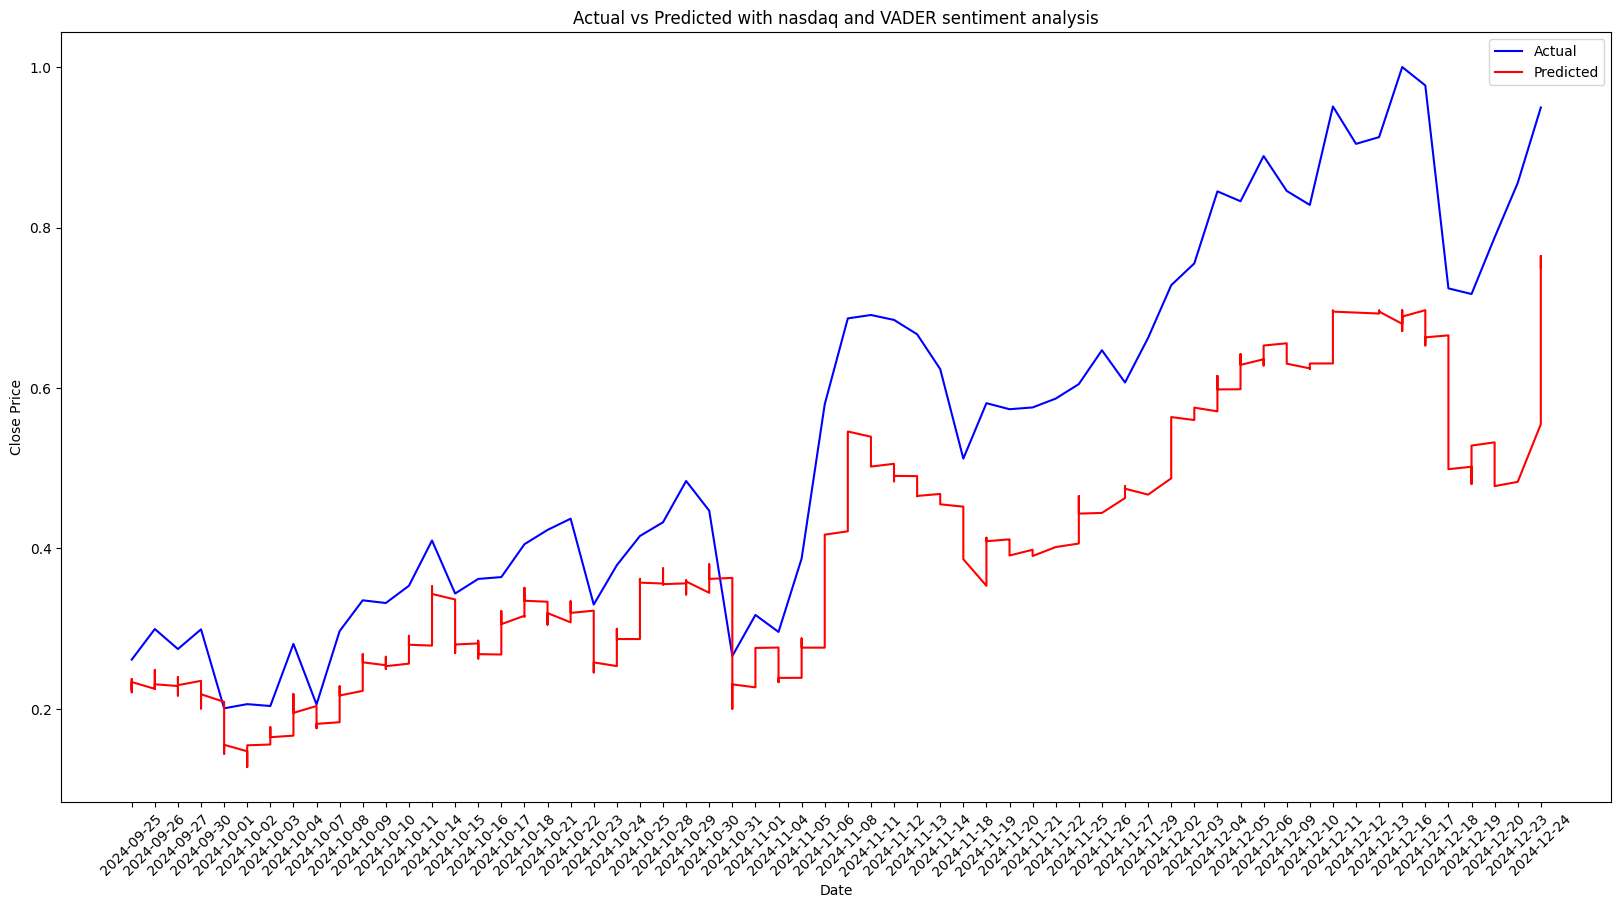

In [44]:
import matplotlib.pyplot as plt

# 예측 수행
y_pred = model.predict(X_test)

# 예측 결과와 실제 결과를 데이터프레임으로 변환
results = pd.DataFrame({
    'Date': day_test,  # 날짜 정보
    'Actual': y_test,
    'Predicted': y_pred.flatten()  # 예측 결과
})

# 시각화
plt.figure(figsize=(20, 10))
plt.plot(results['Date'], results['Actual'], label='Actual', color='blue')
plt.plot(results['Date'], results['Predicted'], label='Predicted', color='red')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted with nasdaq and VADER sentiment analysis')
plt.legend()
plt.show()

### RoBERTa sentiment analysis 활용

In [72]:
roberta = ['Open', 'High', 'Low', 'Volume', 'roberta_sentiment']

In [73]:
# 시퀀스 길이 설정
sequence_length = 60 # 과거 30일 데이터 사용하여 다음 날의 값 예측
X, y, day_seq = create_sequences(df[roberta].values, df['Close'].values, df['day'].values, sequence_length)

# 데이터셋 분리: 훈련 + 검증 데이터와 테스트 데이터로 나누기
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# 훈련 데이터와 검증 데이터로 다시 분리
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42, shuffle=False)

# day_seq도 동일하게 분리
day_train_val, day_test = train_test_split(df['day'].values[sequence_length:], test_size=0.2, random_state=42, shuffle=False)
day_train, day_val = train_test_split(day_train_val, test_size=0.2, random_state=42, shuffle=False)

In [74]:
from keras.callbacks import EarlyStopping

# 조기 종료 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# 하이퍼파라미터 탐색
tuner.search(X_train, y_train,
             epochs=20,
             validation_data=(X_test, y_test),
             callbacks=[early_stopping],
             batch_size=32)

# 최적의 하이퍼파라미터 가져오기
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:")
for hp, value in best_hyperparameters.values.items():
    print(f"{hp}: {value}")

# GRU 모델 -> 최적의 파라미터로 수정
model = Sequential([
    GRU(best_hyperparameters.get('units_1'), return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    GRU(best_hyperparameters.get('units_2')),
    Dropout(0.2),
    Dense(1)
])

# 모델 컴파일
optimizer_name = best_hyperparameters.get('optimizer')
learning_rate = best_hyperparameters.get('learning_rate')

if optimizer_name == 'adam':
    optimizer = 'adam'
else:
    optimizer = 'sgd'

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# 모델 학습
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

# 모델 평가
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.3f}, Test MAE: {test_mae:.3f}")

최적의 하이퍼파라미터:
units_1: 128
units_2: 128
learning_rate: 0.0001
optimizer: sgd
tuner/epochs: 7
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0582 - mae: 0.1746 - val_loss: 0.0071 - val_mae: 0.0736
Epoch 2/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0068 - mae: 0.0651 - val_loss: 0.0024 - val_mae: 0.0372
Epoch 3/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0061 - mae: 0.0613 - val_loss: 0.0021 - val_mae: 0.0332
Epoch 4/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0054 - mae: 0.0576 - val_loss: 0.0021 - val_mae: 0.0330
Epoch 5/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0056 - mae: 0.0583 - val_loss: 0.0021 - val_mae: 0.0333
Epoch 6/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0053 - mae: 0.0570 - val_loss: 0.0022 - val_mae: 0.0343
Epoch 7/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0050 - mae: 0.0560 - val_loss: 0.0022 - val_mae: 0.0340
Epoch 8/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0048 - mae: 0.0539 - val_loss: 0.0022 - val_mae: 0.0344
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011 - mae: 0.026

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


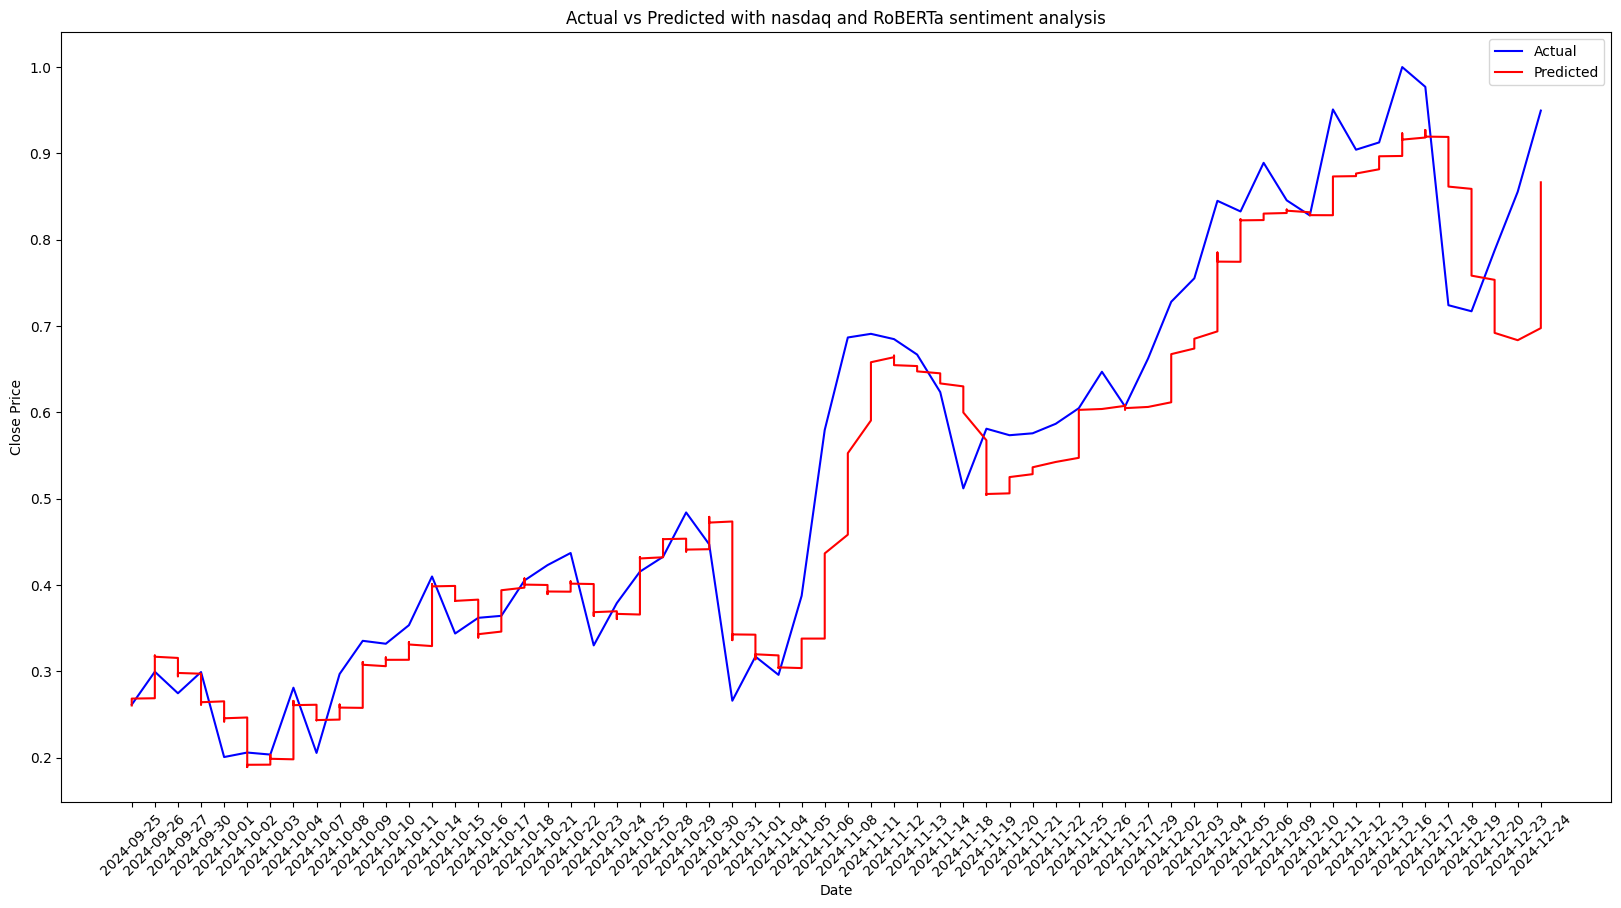

In [75]:
import matplotlib.pyplot as plt

# 예측 수행
y_pred = model.predict(X_test)

# 예측 결과와 실제 결과를 데이터프레임으로 변환
results = pd.DataFrame({
    'Date': day_test,  # 날짜 정보
    'Actual': y_test,
    'Predicted': y_pred.flatten()  # 예측 결과
})

# 시각화
plt.figure(figsize=(20, 10))
plt.plot(results['Date'], results['Actual'], label='Actual', color='blue')
plt.plot(results['Date'], results['Predicted'], label='Predicted', color='red')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted with nasdaq and RoBERTa sentiment analysis')
plt.legend()
plt.show()

### vader + roberta sentiment analysis 활용

In [80]:
total = ['Open', 'High', 'Low', 'Volume', 'total_sentiment']

In [81]:
X, y, day_seq = create_sequences(df[total].values, df['Close'].values, df['day'].values, sequence_length)

# 데이터셋 분리: 훈련 + 검증 데이터와 테스트 데이터로 나누기
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# 훈련 데이터와 검증 데이터로 다시 분리
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42, shuffle=False)

# day_seq도 동일하게 분리
day_train_val, day_test = train_test_split(df['day'].values[sequence_length:], test_size=0.2, random_state=42, shuffle=False)
day_train, day_val = train_test_split(day_train_val, test_size=0.2, random_state=42, shuffle=False)

In [82]:
from keras.callbacks import EarlyStopping

# 조기 종료 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# 하이퍼파라미터 탐색
tuner.search(X_train, y_train,
             epochs=20,
             validation_data=(X_test, y_test),
             callbacks=[early_stopping],
             batch_size=32)

# 최적의 하이퍼파라미터 가져오기
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:")
for hp, value in best_hyperparameters.values.items():
    print(f"{hp}: {value}")

# GRU 모델 -> 최적의 파라미터로 수정
model = Sequential([
    GRU(best_hyperparameters.get('units_1'), return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    GRU(best_hyperparameters.get('units_2')),
    Dropout(0.2),
    Dense(1)
])

# 모델 컴파일
optimizer_name = best_hyperparameters.get('optimizer')
learning_rate = best_hyperparameters.get('learning_rate')

if optimizer_name == 'adam':
    optimizer = 'adam'
else:
    optimizer = 'sgd'

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# 모델 학습
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

# 모델 평가
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.3f}, Test MAE: {test_mae:.3f}")

최적의 하이퍼파라미터:
units_1: 128
units_2: 128
learning_rate: 0.0001
optimizer: sgd
tuner/epochs: 7
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0494 - mae: 0.1639 - val_loss: 0.0052 - val_mae: 0.0617
Epoch 2/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0077 - mae: 0.0694 - val_loss: 0.0022 - val_mae: 0.0340
Epoch 3/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0062 - mae: 0.0624 - val_loss: 0.0022 - val_mae: 0.0348
Epoch 4/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0057 - mae: 0.0591 - val_loss: 0.0021 - val_mae: 0.0329
Epoch 5/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0057 - mae: 0.0587 - val_loss: 0.0021 - val_mae: 0.0333
Epoch 6/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0056 - mae: 0.0576 - val_loss: 0.0022 - val_mae: 0.0337
Epoch 7/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0053 - mae: 0.0567 - val_loss: 0.0022 - val_mae: 0.0348
Epoch 8/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0049 - mae: 0.0549 - val_loss: 0.0025 - val_mae: 0.0374
Epoch 9/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


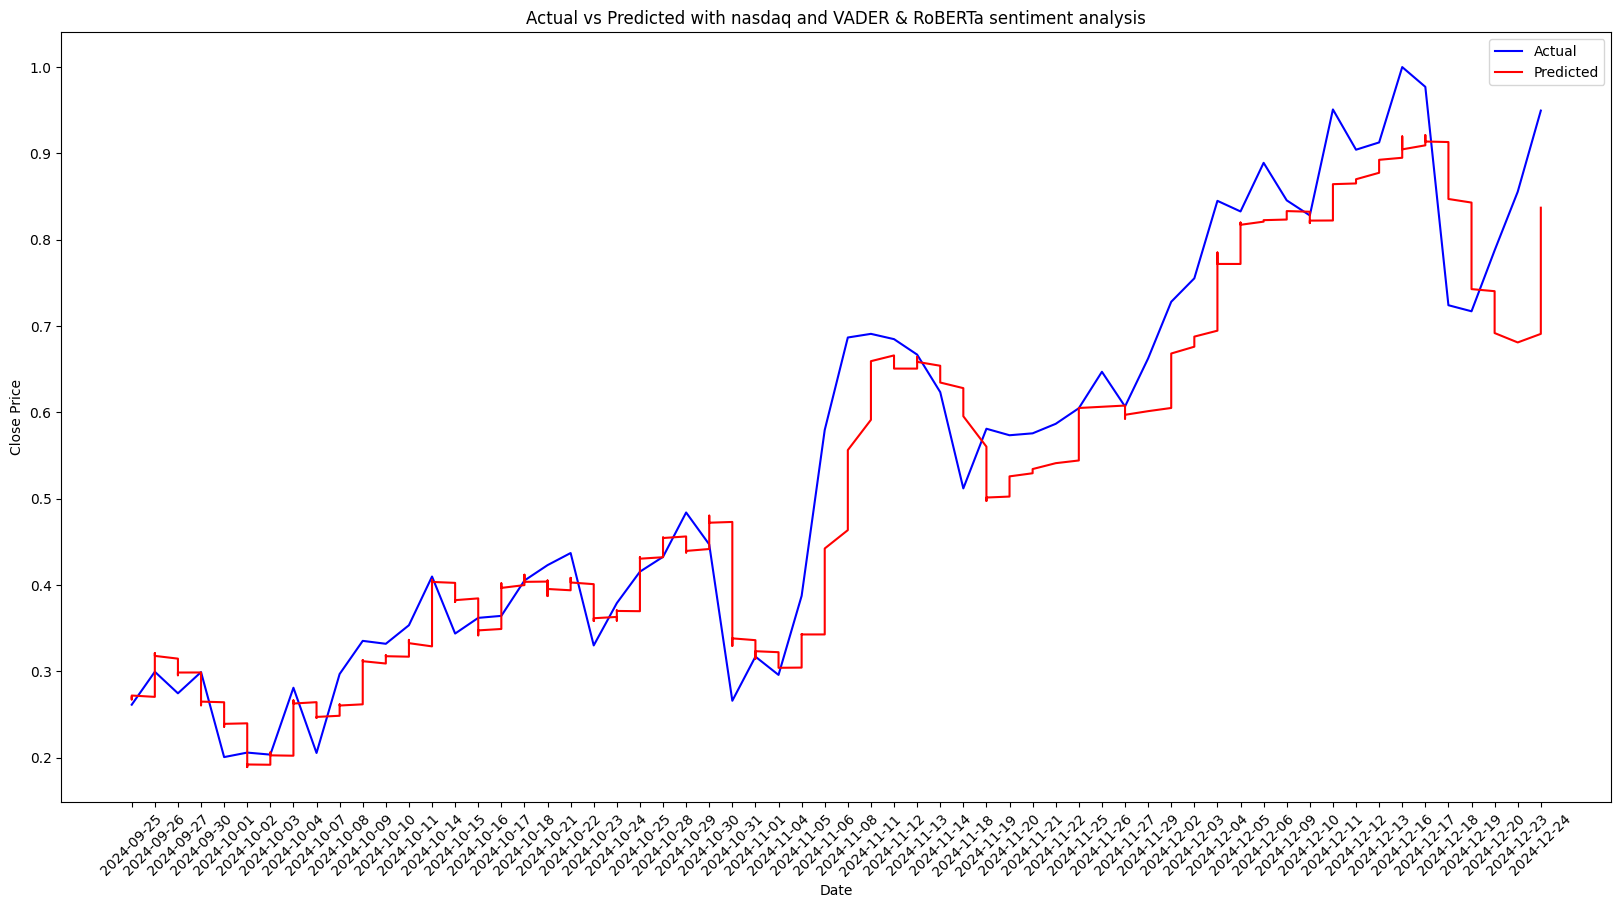

In [83]:
import matplotlib.pyplot as plt

# 예측 수행
y_pred = model.predict(X_test)

# 예측 결과와 실제 결과를 데이터프레임으로 변환
results = pd.DataFrame({
    'Date': day_test,  # 날짜 정보
    'Actual': y_test,
    'Predicted': y_pred.flatten()  # 예측 결과
})

# 시각화
plt.figure(figsize=(20, 10))
plt.plot(results['Date'], results['Actual'], label='Actual', color='blue')
plt.plot(results['Date'], results['Predicted'], label='Predicted', color='red')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted with nasdaq and VADER & RoBERTa sentiment analysis')
plt.legend()
plt.show()

# Bi-GRU

In [56]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GRU, Dense, Dropout

In [104]:
# Bi-GRU model

from keras.models import Sequential
from keras.layers import Bidirectional, GRU, Dropout, Dense
import keras_tuner

def build_model_bi_gru(hp):
    model = Sequential()

    """model = Sequential([
        Bidirectional(GRU(64, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
        Dropout(0.2),
        Bidirectional(GRU(64)),
        Dropout(0.2),
        Dense(1)])"""

    # 첫 번째 Bi-GRU layer unit 조정
    units_1 = hp.Int('units_1', min_value=32, max_value=128, step=32)
    model.add(Bidirectional(GRU(units_1, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))))
    model.add(Dropout(0.2))

    # 두 번째 Bi-GRU layer unit 조정
    units_2 = hp.Int('units_2', min_value=32, max_value=128, step=32)
    model.add(Bidirectional(GRU(units_2)))
    model.add(Dropout(0.2))

    # 출력 layer
    model.add(Dense(1))

    # learning rate
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # optimizer
    optimizer_name = hp.Choice('optimizer', values=['adam', 'sgd'])
    if optimizer_name == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate)

    # 모델 컴파일
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model


In [105]:
from keras_tuner import Hyperband

tuner_bi = Hyperband(
    build_model_bi_gru,
    objective='val_mae',
    factor=3, # 성능이 좋지 않은 조합을 얼마나 빨리 중단할지
    max_epochs=20, # 각 하이퍼파라미터 조합에 대해 최대 20 에폭 동안 학습
    overwrite=True
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### nasdaq 지수만 활용

In [110]:
X, y, day_seq = create_sequences(df[nasdaq].values, df['Close'].values, df['day'].values, sequence_length)

# 데이터셋 분리: 훈련 + 검증 데이터와 테스트 데이터로 나누기
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# 훈련 데이터와 검증 데이터로 다시 분리
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42, shuffle=False)

# day_seq도 동일하게 분리
day_train_val, day_test = train_test_split(df['day'].values[sequence_length:], test_size=0.2, random_state=42, shuffle=False)
day_train, day_val = train_test_split(day_train_val, test_size=0.2, random_state=42, shuffle=False)

In [111]:
from keras.callbacks import EarlyStopping

# 조기 종료 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# 하이퍼파라미터 탐색
tuner_bi.search(X_train, y_train,
                epochs=20,
                validation_data=(X_test, y_test),
                callbacks=[early_stopping],
                batch_size=32)

# 최적의 하이퍼파라미터 가져오기
best_hyperparameters = tuner_bi.get_best_hyperparameters(num_trials=1)[0]

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:")
for hp, value in best_hyperparameters.values.items():
    print(f"{hp}: {value}")

# Bi-GRU 모델 -> 최적의 파라미터로 수정
model = Sequential([
    Bidirectional(GRU(best_hyperparameters.get('units_1'), return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))),
    Dropout(0.2),
    Bidirectional(GRU(best_hyperparameters.get('units_2'))),
    Dropout(0.2),
    Dense(1)
])

# 모델 컴파일
optimizer_name = best_hyperparameters.get('optimizer')
learning_rate = best_hyperparameters.get('learning_rate')

if optimizer_name == 'adam':
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
else:
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# 모델 학습
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

# 모델 평가
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.3f}, Test MAE: {test_mae:.3f}")

최적의 하이퍼파라미터:
units_1: 128
units_2: 128
learning_rate: 0.001
optimizer: adam
tuner/epochs: 20
tuner/initial_epoch: 7
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0012
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.0309 - mae: 0.1137 - val_loss: 0.0018 - val_mae: 0.0318
Epoch 2/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0029 - mae: 0.0421 - val_loss: 0.0020 - val_mae: 0.0322
Epoch 3/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0023 - mae: 0.0364 - val_loss: 0.0016 - val_mae: 0.0291
Epoch 4/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0022 - mae: 0.0359 - val_loss: 0.0017 - val_mae: 0.0298
Epoch 5/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0019 - mae: 0.0328 - val_loss: 0.0011 - val_mae: 0.0254
Epoch 6/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0017 - mae: 0.0313 - val_loss: 0.0011 - val_mae: 0.0254
Epoch 7/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0020 - mae: 0.0336 - val_loss: 0.0012 - val_mae: 0.0262
Epoch 8/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0017 - mae: 0.0313 - val_loss: 0.0053 - val_mae: 0.0600
Epoch 9/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


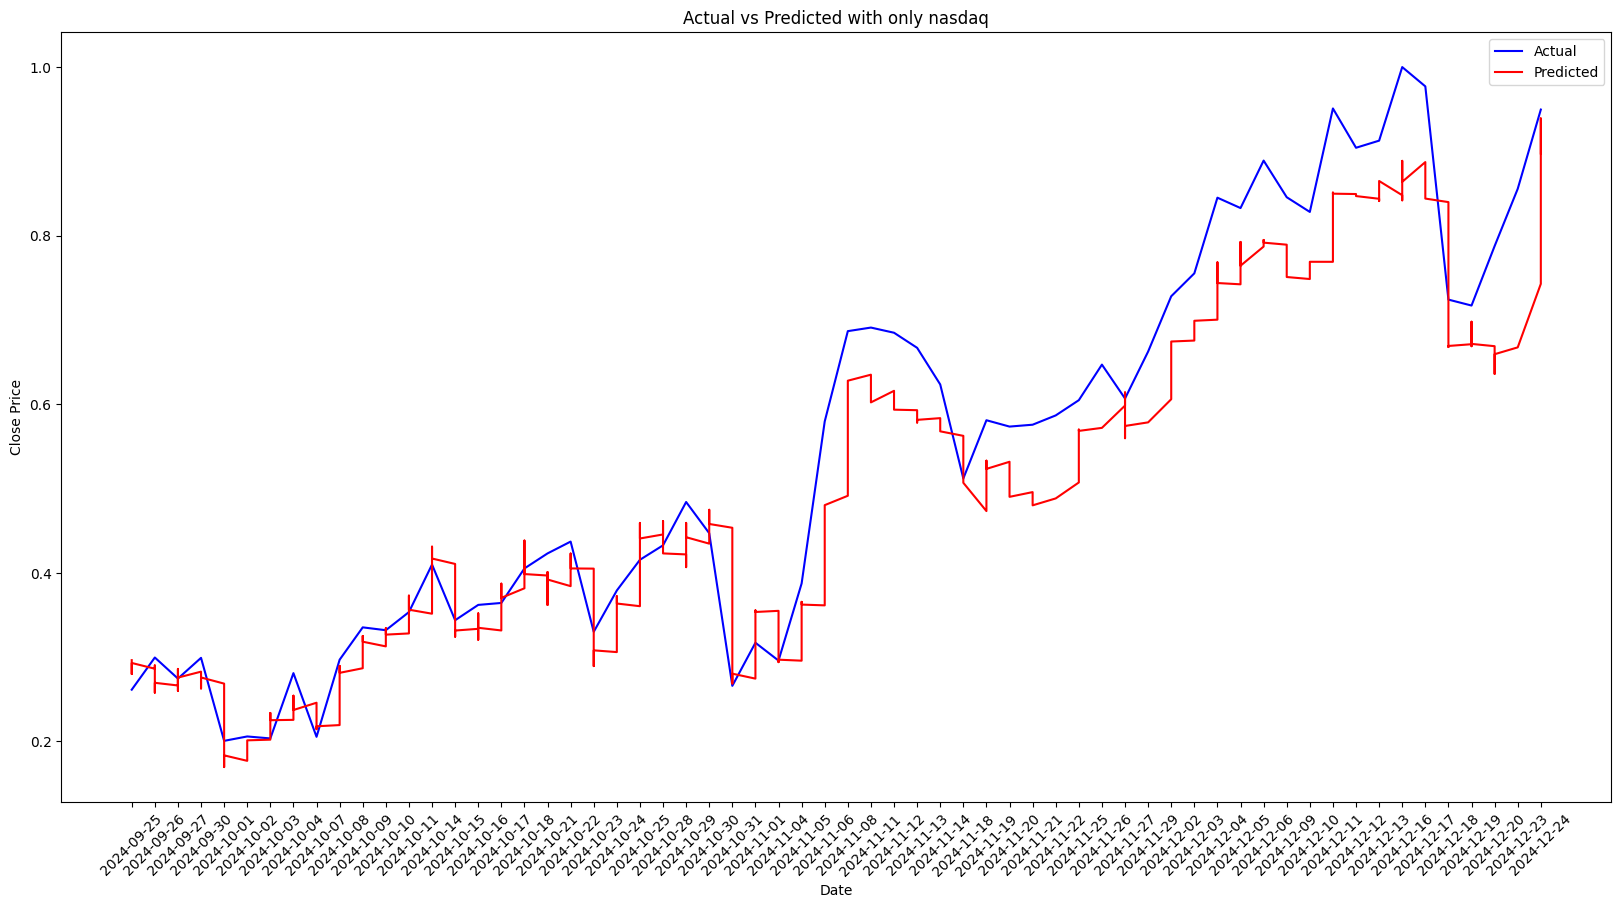

In [94]:
import matplotlib.pyplot as plt

# 예측 수행
y_pred = model.predict(X_test)

# 예측 결과와 실제 결과를 데이터프레임으로 변환
results = pd.DataFrame({
    'Date': day_test,  # 날짜 정보
    'Actual': y_test,
    'Predicted': y_pred.flatten()  # 예측 결과
})

# 시각화
plt.figure(figsize=(20, 10))
plt.plot(results['Date'], results['Actual'], label='Actual', color='blue')
plt.plot(results['Date'], results['Predicted'], label='Predicted', color='red')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted with only nasdaq')
plt.legend()
plt.show()

### VADER sentiment analysis 활용

In [112]:
X, y, day_seq = create_sequences(df[vader].values, df['Close'].values, df['day'].values, sequence_length)

# 데이터셋 분리: 훈련 + 검증 데이터와 테스트 데이터로 나누기
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# 훈련 데이터와 검증 데이터로 다시 분리
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42, shuffle=False)

# day_seq도 동일하게 분리
day_train_val, day_test = train_test_split(df['day'].values[sequence_length:], test_size=0.2, random_state=42, shuffle=False)
day_train, day_val = train_test_split(day_train_val, test_size=0.2, random_state=42, shuffle=False)

In [113]:
from keras.callbacks import EarlyStopping

# 조기 종료 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# 하이퍼파라미터 탐색
tuner_bi.search(X_train, y_train,
                epochs=20,
                validation_data=(X_test, y_test),
                callbacks=[early_stopping],
                batch_size=32)

# 최적의 하이퍼파라미터 가져오기
best_hyperparameters = tuner_bi.get_best_hyperparameters(num_trials=1)[0]

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:")
for hp, value in best_hyperparameters.values.items():
    print(f"{hp}: {value}")

# Bi-GRU 모델 -> 최적의 파라미터로 수정
model = Sequential([
    Bidirectional(GRU(best_hyperparameters.get('units_1'), return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))),
    Dropout(0.2),
    Bidirectional(GRU(best_hyperparameters.get('units_2'))),
    Dropout(0.2),
    Dense(1)
])

# 모델 컴파일
optimizer_name = best_hyperparameters.get('optimizer')
learning_rate = best_hyperparameters.get('learning_rate')

if optimizer_name == 'adam':
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
else:
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# 모델 학습
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

# 모델 평가
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.3f}, Test MAE: {test_mae:.3f}")

최적의 하이퍼파라미터:
units_1: 128
units_2: 128
learning_rate: 0.001
optimizer: adam
tuner/epochs: 20
tuner/initial_epoch: 7
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0012
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0179 - mae: 0.0956 - val_loss: 0.0021 - val_mae: 0.0357
Epoch 2/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0033 - mae: 0.0454 - val_loss: 0.0014 - val_mae: 0.0281
Epoch 3/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0027 - mae: 0.0395 - val_loss: 0.0042 - val_mae: 0.0504
Epoch 4/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0024 - mae: 0.0382 - val_loss: 0.0032 - val_mae: 0.0424
Epoch 5/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0020 - mae: 0.0351 - val_loss: 0.0022 - val_mae: 0.0364
Epoch 6/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0021 - mae: 0.0350 - val_loss: 0.0030 - val_mae: 0.0415
Epoch 7/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0017 - mae: 0.0319 - val_loss: 0.0029 - val_mae: 0.0389
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - mae: 0.0253
Test Loss: 0.003, Test MAE: 0.039


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


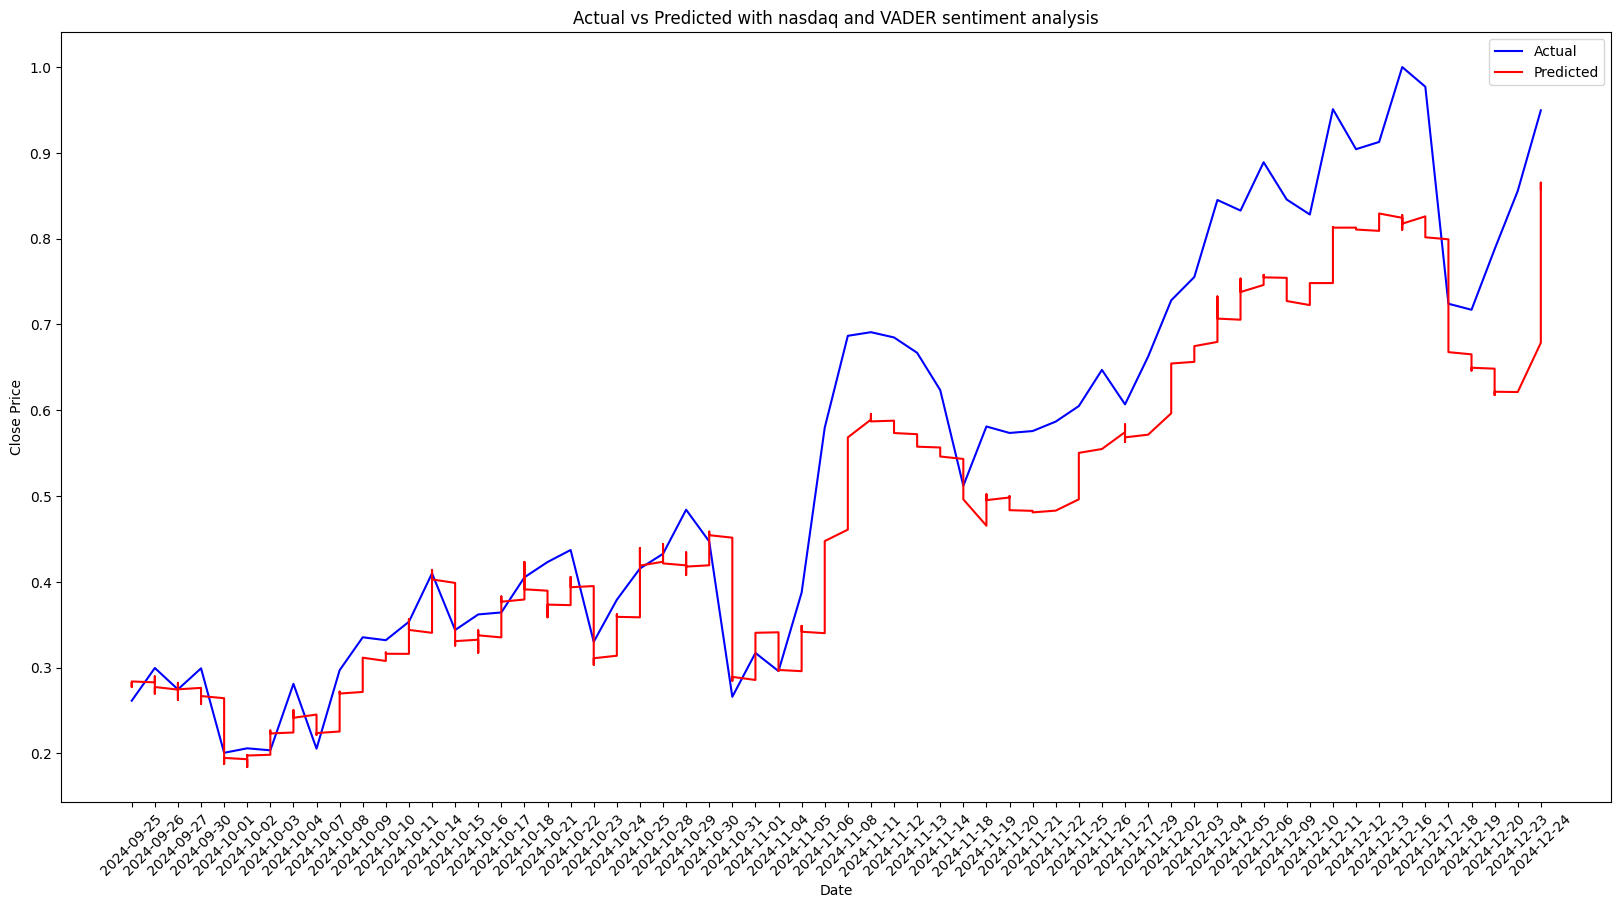

In [97]:
import matplotlib.pyplot as plt

# 예측 수행
y_pred = model.predict(X_test)

# 예측 결과와 실제 결과를 데이터프레임으로 변환
results = pd.DataFrame({
    'Date': day_test,  # 날짜 정보
    'Actual': y_test,
    'Predicted': y_pred.flatten()  # 예측 결과
})

# 시각화
plt.figure(figsize=(20, 10))
plt.plot(results['Date'], results['Actual'], label='Actual', color='blue')
plt.plot(results['Date'], results['Predicted'], label='Predicted', color='red')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted with nasdaq and VADER sentiment analysis')
plt.legend()
plt.show()

### RoBERTa sentiment analysis 활용

In [106]:
X, y, day_seq = create_sequences(df[roberta].values, df['Close'].values, df['day'].values, sequence_length)

# 데이터셋 분리: 훈련 + 검증 데이터와 테스트 데이터로 나누기
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# 훈련 데이터와 검증 데이터로 다시 분리
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42, shuffle=False)

# day_seq도 동일하게 분리
day_train_val, day_test = train_test_split(df['day'].values[sequence_length:], test_size=0.2, random_state=42, shuffle=False)
day_train, day_val = train_test_split(day_train_val, test_size=0.2, random_state=42, shuffle=False)

In [107]:
from keras.callbacks import EarlyStopping

# 조기 종료 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# 하이퍼파라미터 탐색
tuner_bi.search(X_train, y_train,
                epochs=20,
                validation_data=(X_test, y_test),
                callbacks=[early_stopping],
                batch_size=32)

# 최적의 하이퍼파라미터 가져오기
best_hyperparameters = tuner_bi.get_best_hyperparameters(num_trials=1)[0]

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:")
for hp, value in best_hyperparameters.values.items():
    print(f"{hp}: {value}")

# Bi-GRU 모델 -> 최적의 파라미터로 수정
model = Sequential([
    Bidirectional(GRU(best_hyperparameters.get('units_1'), return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))),
    Dropout(0.2),
    Bidirectional(GRU(best_hyperparameters.get('units_2'))),
    Dropout(0.2),
    Dense(1)
])

# 모델 컴파일
optimizer_name = best_hyperparameters.get('optimizer')
learning_rate = best_hyperparameters.get('learning_rate')

if optimizer_name == 'adam':
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
else:
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# 모델 학습
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

# 모델 평가
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.3f}, Test MAE: {test_mae:.3f}")

Trial 30 Complete [00h 00m 58s]
val_mae: 0.03425475209951401

Best val_mae So Far: 0.024399284273386
Total elapsed time: 00h 10m 50s
최적의 하이퍼파라미터:
units_1: 128
units_2: 128
learning_rate: 0.001
optimizer: adam
tuner/epochs: 20
tuner/initial_epoch: 7
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0012
Epoch 1/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0276 - mae: 0.1138 - val_loss: 0.0040 - val_mae: 0.0496
Epoch 2/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0035 - mae: 0.0462 - val_loss: 0.0036 - val_mae: 0.0483
Epoch 3/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0026 - mae: 0.0398 - val_loss: 0.0012 - val_mae: 0.0266
Epoch 4/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0024 - mae: 0.0376 - val_loss: 0.0021 - val_mae: 0.0329
Epoch 5/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0022 - mae: 0.0358 - val_loss: 0.0016 - val_mae: 0.0297
Epoch 6/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0018 - mae: 0.0328 - val_loss: 0.0014 - 

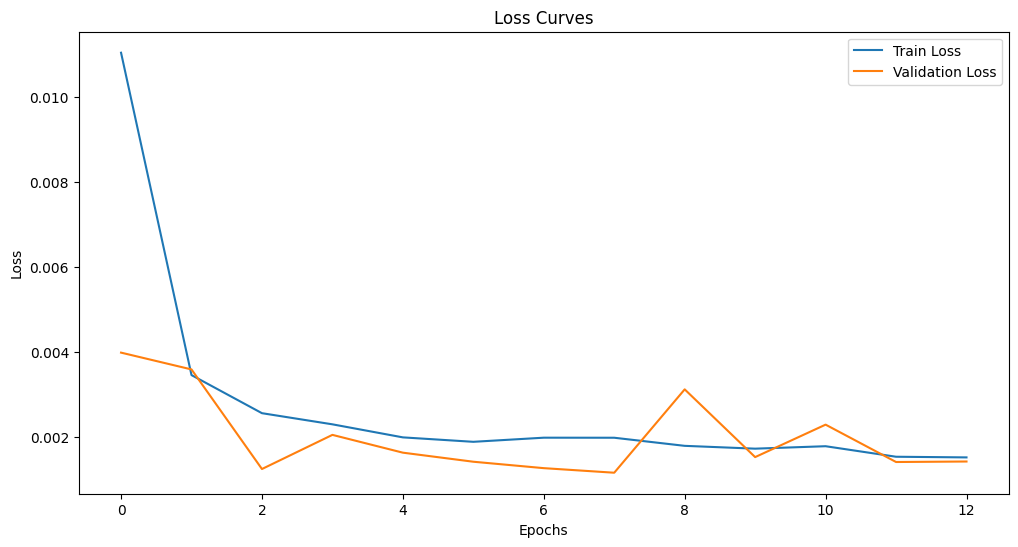

In [108]:
import matplotlib.pyplot as plt

# 손실 시각화
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

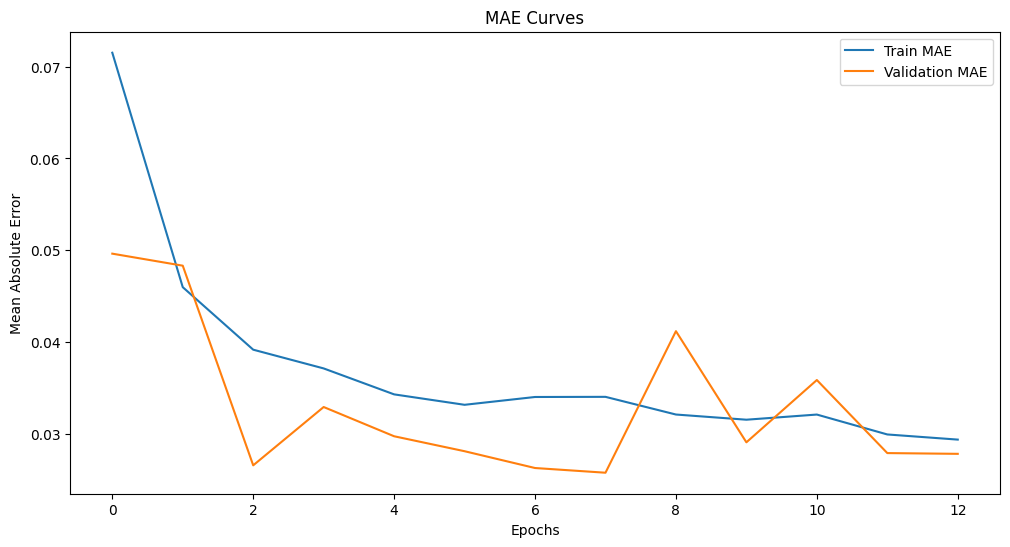

In [109]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE Curves')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


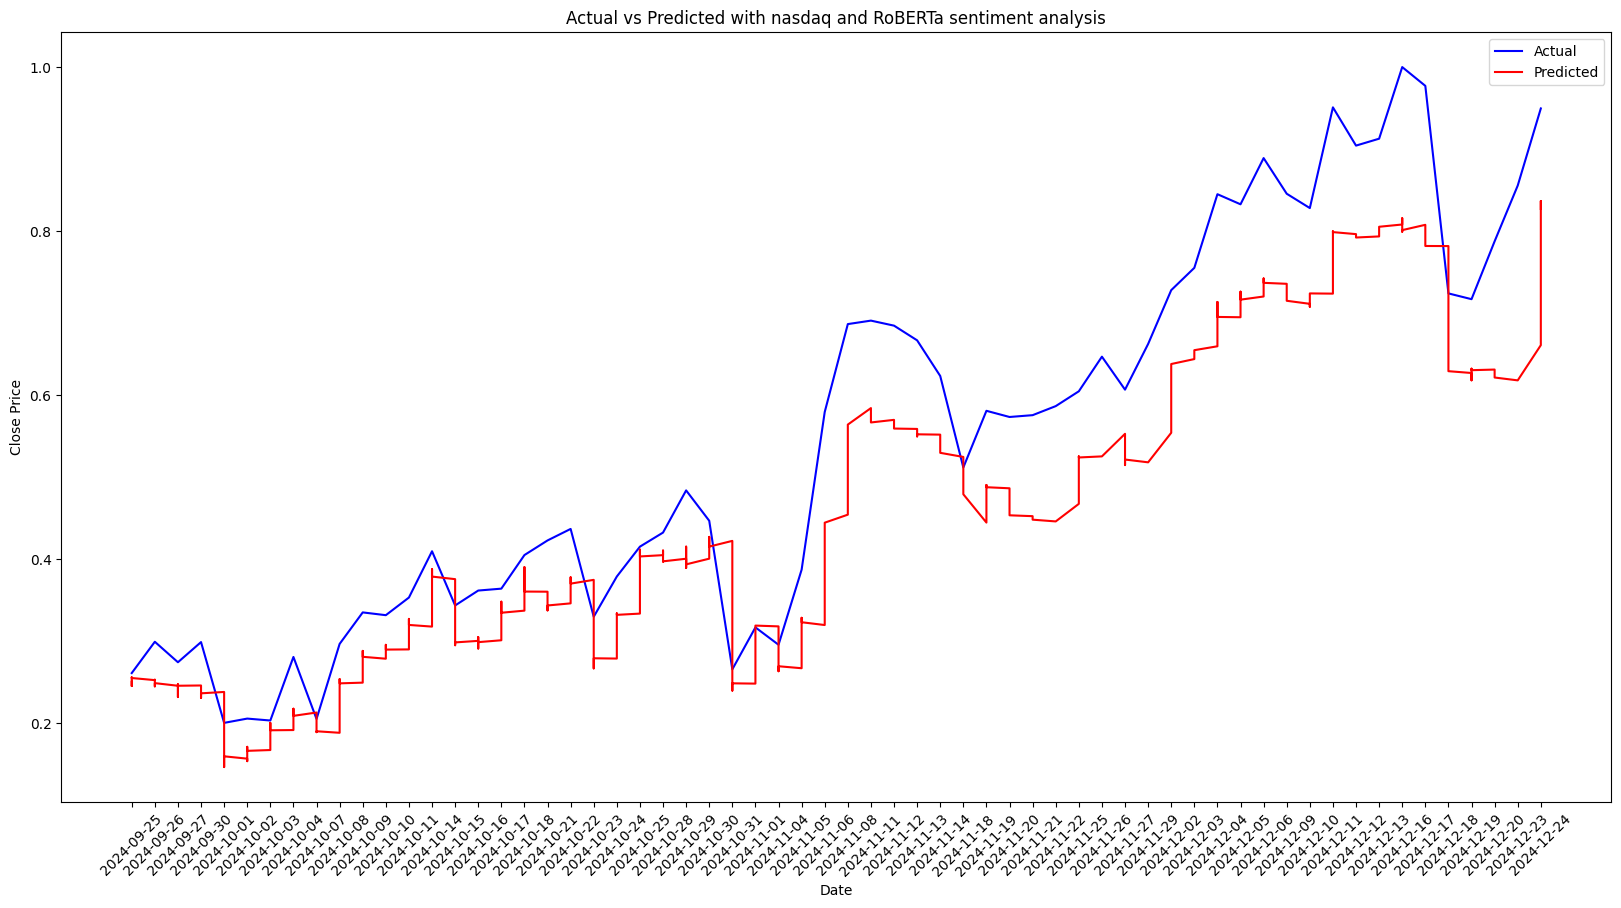

In [100]:
import matplotlib.pyplot as plt

# 예측 수행
y_pred = model.predict(X_test)

# 예측 결과와 실제 결과를 데이터프레임으로 변환
results = pd.DataFrame({
    'Date': day_test,  # 날짜 정보
    'Actual': y_test,
    'Predicted': y_pred.flatten()  # 예측 결과
})

# 시각화
plt.figure(figsize=(20, 10))
plt.plot(results['Date'], results['Actual'], label='Actual', color='blue')
plt.plot(results['Date'], results['Predicted'], label='Predicted', color='red')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted with nasdaq and RoBERTa sentiment analysis')
plt.legend()
plt.show()

### VADER + RoBERTa sentiment analysis 활용

In [114]:
X, y, day_seq = create_sequences(df[total].values, df['Close'].values, df['day'].values, sequence_length)

# 데이터셋 분리: 훈련 + 검증 데이터와 테스트 데이터로 나누기
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# 훈련 데이터와 검증 데이터로 다시 분리
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42, shuffle=False)

# day_seq도 동일하게 분리
day_train_val, day_test = train_test_split(df['day'].values[sequence_length:], test_size=0.2, random_state=42, shuffle=False)
day_train, day_val = train_test_split(day_train_val, test_size=0.2, random_state=42, shuffle=False)

In [115]:
from keras.callbacks import EarlyStopping

# 조기 종료 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# 하이퍼파라미터 탐색
tuner_bi.search(X_train, y_train,
                epochs=20,
                validation_data=(X_test, y_test),
                callbacks=[early_stopping],
                batch_size=32)

# 최적의 하이퍼파라미터 가져오기
best_hyperparameters = tuner_bi.get_best_hyperparameters(num_trials=1)[0]

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:")
for hp, value in best_hyperparameters.values.items():
    print(f"{hp}: {value}")

# Bi-GRU 모델 -> 최적의 파라미터로 수정
model = Sequential([
    Bidirectional(GRU(best_hyperparameters.get('units_1'), return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))),
    Dropout(0.2),
    Bidirectional(GRU(best_hyperparameters.get('units_2'))),
    Dropout(0.2),
    Dense(1)
])

# 모델 컴파일
optimizer_name = best_hyperparameters.get('optimizer')
learning_rate = best_hyperparameters.get('learning_rate')

if optimizer_name == 'adam':
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
else:
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# 모델 학습
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

# 모델 평가
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.3f}, Test MAE: {test_mae:.3f}")

최적의 하이퍼파라미터:
units_1: 128
units_2: 128
learning_rate: 0.001
optimizer: adam
tuner/epochs: 20
tuner/initial_epoch: 7
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0012
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


111/111 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 0.0367 - mae: 0.1259 - val_loss: 0.0021 - val_mae: 0.0346
Epoch 2/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0031 - mae: 0.0430 - val_loss: 0.0020 - val_mae: 0.0323
Epoch 3/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0026 - mae: 0.0393 - val_loss: 0.0020 - val_mae: 0.0336
Epoch 4/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0024 - mae: 0.0381 - val_loss: 0.0016 - val_mae: 0.0297
Epoch 5/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0022 - mae: 0.0362 - val_loss: 0.0015 - val_mae: 0.0302
Epoch 6/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0020 - mae: 0.0343 - val_loss: 0.0015 - val_mae: 0.0286
Epoch 7/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0021 - mae: 0.0350 - val_loss: 0.0015 - val_mae: 0.0285
Epoch 8/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0018 - mae: 0.0324 - val_loss: 0.0018 - val_mae: 0.0314
Epoch 9/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


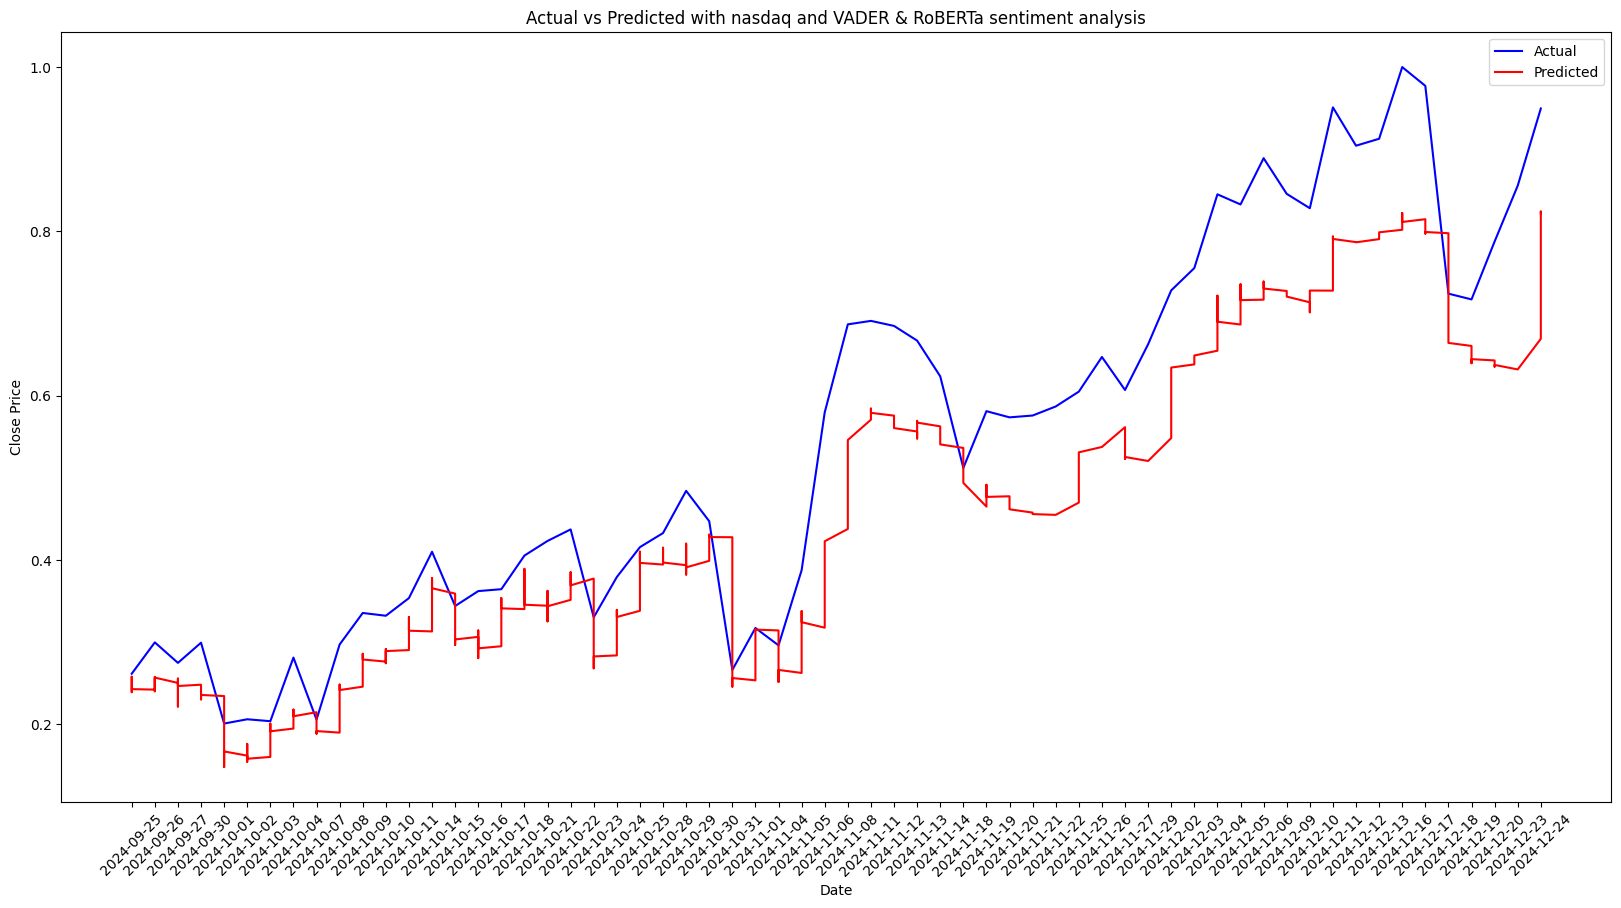

In [103]:
import matplotlib.pyplot as plt

# 예측 수행
y_pred = model.predict(X_test)

# 예측 결과와 실제 결과를 데이터프레임으로 변환
results = pd.DataFrame({
    'Date': day_test,  # 날짜 정보
    'Actual': y_test,
    'Predicted': y_pred.flatten()  # 예측 결과
})

# 시각화
plt.figure(figsize=(20, 10))
plt.plot(results['Date'], results['Actual'], label='Actual', color='blue')
plt.plot(results['Date'], results['Predicted'], label='Predicted', color='red')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted with nasdaq and VADER & RoBERTa sentiment analysis')
plt.legend()
plt.show()

# Bi-GRU -> max layer 256으로 (best가 모두 128 나와서) => 128로 가자..

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GRU, Dense, Dropout

In [116]:
# Bi-GRU model

from keras.models import Sequential
from keras.layers import Bidirectional, GRU, Dropout, Dense
import keras_tuner

def build_model_bi_gru(hp):
    model = Sequential()

    """model = Sequential([
        Bidirectional(GRU(64, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
        Dropout(0.2),
        Bidirectional(GRU(64)),
        Dropout(0.2),
        Dense(1)])"""

    # 첫 번째 Bi-GRU layer unit 조정
    units_1 = hp.Int('units_1', min_value=32, max_value=256, step=32)
    model.add(Bidirectional(GRU(units_1, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))))
    model.add(Dropout(0.2))

    # 두 번째 Bi-GRU layer unit 조정
    units_2 = hp.Int('units_2', min_value=32, max_value=256, step=32)
    model.add(Bidirectional(GRU(units_2)))
    model.add(Dropout(0.2))

    # 출력 layer
    model.add(Dense(1))

    # learning rate
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # optimizer
    optimizer_name = hp.Choice('optimizer', values=['adam', 'sgd'])
    if optimizer_name == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate)

    # 모델 컴파일
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model


In [117]:
from keras_tuner import Hyperband

tuner_bi = Hyperband(
    build_model_bi_gru,
    objective='val_mae',
    factor=3, # 성능이 좋지 않은 조합을 얼마나 빨리 중단할지
    max_epochs=20, # 각 하이퍼파라미터 조합에 대해 최대 20 에폭 동안 학습
    overwrite=True
)

### nasdaq 지수만 활용

In [118]:
X, y, day_seq = create_sequences(df[nasdaq].values, df['Close'].values, df['day'].values, sequence_length)

# 데이터셋 분리: 훈련 + 검증 데이터와 테스트 데이터로 나누기
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# 훈련 데이터와 검증 데이터로 다시 분리
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42, shuffle=False)

# day_seq도 동일하게 분리
day_train_val, day_test = train_test_split(df['day'].values[sequence_length:], test_size=0.2, random_state=42, shuffle=False)
day_train, day_val = train_test_split(day_train_val, test_size=0.2, random_state=42, shuffle=False)

In [119]:
from keras.callbacks import EarlyStopping

# 조기 종료 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# 하이퍼파라미터 탐색
tuner_bi.search(X_train, y_train,
                epochs=20,
                validation_data=(X_test, y_test),
                callbacks=[early_stopping],
                batch_size=32)

# 최적의 하이퍼파라미터 가져오기
best_hyperparameters = tuner_bi.get_best_hyperparameters(num_trials=1)[0]

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:")
for hp, value in best_hyperparameters.values.items():
    print(f"{hp}: {value}")

# Bi-GRU 모델 -> 최적의 파라미터로 수정
model = Sequential([
    Bidirectional(GRU(best_hyperparameters.get('units_1'), return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))),
    Dropout(0.2),
    Bidirectional(GRU(best_hyperparameters.get('units_2'))),
    Dropout(0.2),
    Dense(1)
])

# 모델 컴파일
optimizer_name = best_hyperparameters.get('optimizer')
learning_rate = best_hyperparameters.get('learning_rate')

if optimizer_name == 'adam':
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
else:
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# 모델 학습
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

# 모델 평가
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.3f}, Test MAE: {test_mae:.3f}")

Trial 30 Complete [00h 00m 56s]
val_mae: 0.03363877162337303

Best val_mae So Far: 0.027129152789711952
Total elapsed time: 00h 12m 42s
최적의 하이퍼파라미터:
units_1: 64
units_2: 96
learning_rate: 0.001
optimizer: adam
tuner/epochs: 20
tuner/initial_epoch: 7
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0020
Epoch 1/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0269 - mae: 0.1139 - val_loss: 0.0020 - val_mae: 0.0348
Epoch 2/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0033 - mae: 0.0444 - val_loss: 0.0025 - val_mae: 0.0358
Epoch 3/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0026 - mae: 0.0390 - val_loss: 0.0035 - val_mae: 0.0470
Epoch 4/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0024 - mae: 0.0380 - val_loss: 0.0017 - val_mae: 0.0311
Epoch 5/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0021 - mae: 0.0344 - val_loss: 0.0015 - val_mae: 0.0287
Epoch 6/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0022 - mae: 0.0360 - val_loss: 0.0027 -

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


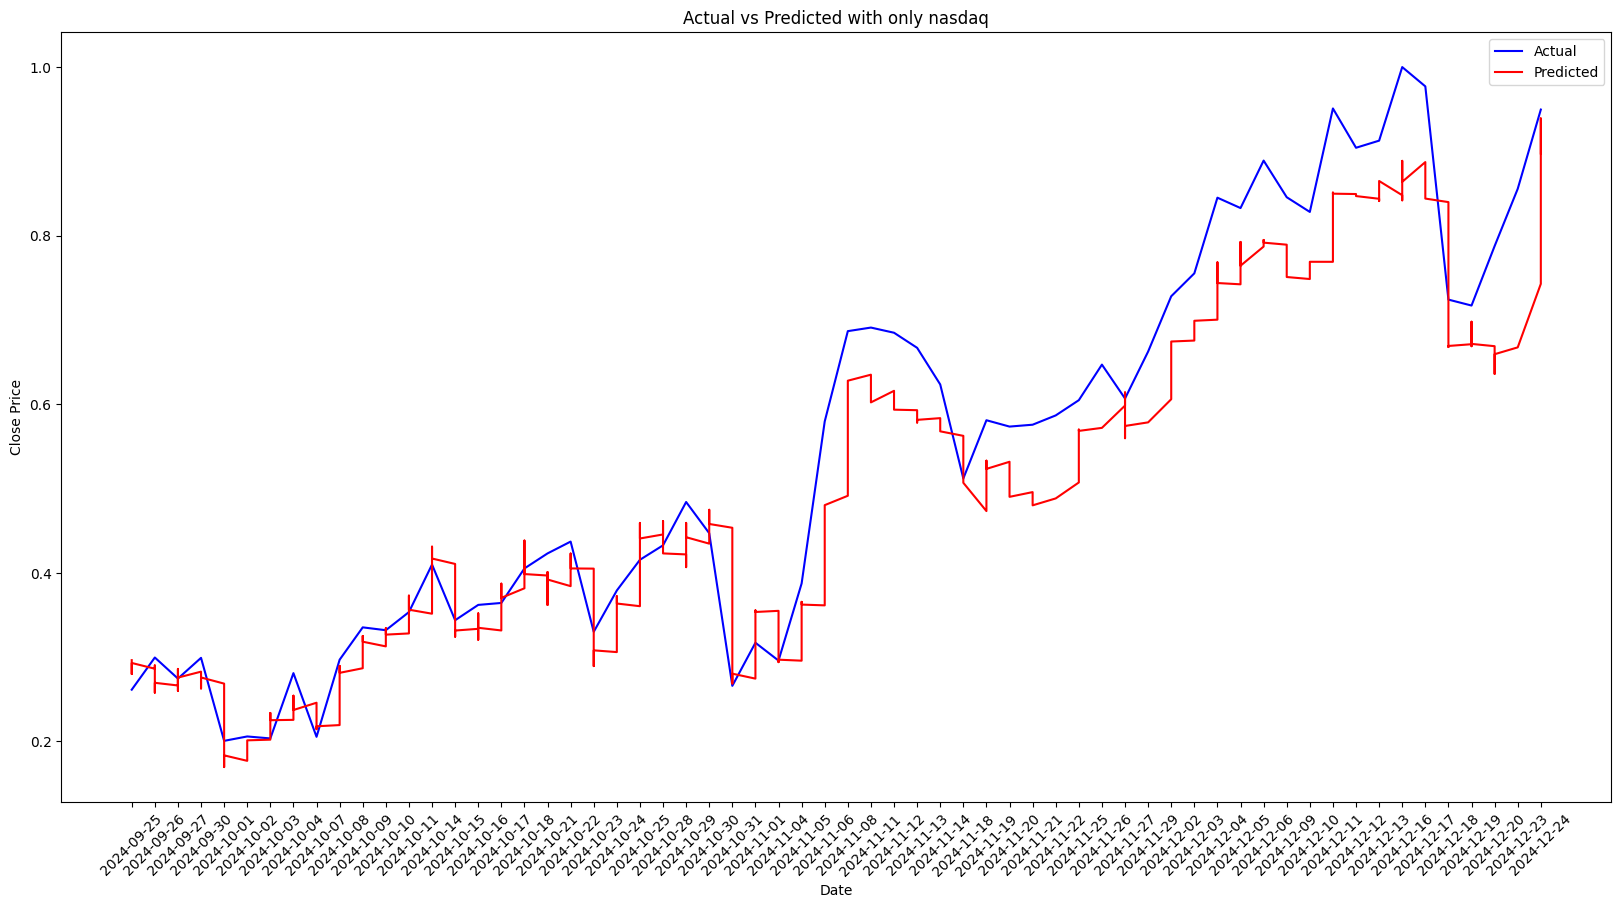

In [ ]:
import matplotlib.pyplot as plt

# 예측 수행
y_pred = model.predict(X_test)

# 예측 결과와 실제 결과를 데이터프레임으로 변환
results = pd.DataFrame({
    'Date': day_test,  # 날짜 정보
    'Actual': y_test,
    'Predicted': y_pred.flatten()  # 예측 결과
})

# 시각화
plt.figure(figsize=(20, 10))
plt.plot(results['Date'], results['Actual'], label='Actual', color='blue')
plt.plot(results['Date'], results['Predicted'], label='Predicted', color='red')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted with only nasdaq')
plt.legend()
plt.show()

### VADER sentiment analysis 활용

In [120]:
X, y, day_seq = create_sequences(df[vader].values, df['Close'].values, df['day'].values, sequence_length)

# 데이터셋 분리: 훈련 + 검증 데이터와 테스트 데이터로 나누기
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# 훈련 데이터와 검증 데이터로 다시 분리
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42, shuffle=False)

# day_seq도 동일하게 분리
day_train_val, day_test = train_test_split(df['day'].values[sequence_length:], test_size=0.2, random_state=42, shuffle=False)
day_train, day_val = train_test_split(day_train_val, test_size=0.2, random_state=42, shuffle=False)

In [121]:
from keras.callbacks import EarlyStopping

# 조기 종료 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# 하이퍼파라미터 탐색
tuner_bi.search(X_train, y_train,
                epochs=20,
                validation_data=(X_test, y_test),
                callbacks=[early_stopping],
                batch_size=32)

# 최적의 하이퍼파라미터 가져오기
best_hyperparameters = tuner_bi.get_best_hyperparameters(num_trials=1)[0]

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:")
for hp, value in best_hyperparameters.values.items():
    print(f"{hp}: {value}")

# Bi-GRU 모델 -> 최적의 파라미터로 수정
model = Sequential([
    Bidirectional(GRU(best_hyperparameters.get('units_1'), return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))),
    Dropout(0.2),
    Bidirectional(GRU(best_hyperparameters.get('units_2'))),
    Dropout(0.2),
    Dense(1)
])

# 모델 컴파일
optimizer_name = best_hyperparameters.get('optimizer')
learning_rate = best_hyperparameters.get('learning_rate')

if optimizer_name == 'adam':
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
else:
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# 모델 학습
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

# 모델 평가
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.3f}, Test MAE: {test_mae:.3f}")

최적의 하이퍼파라미터:
units_1: 64
units_2: 96
learning_rate: 0.001
optimizer: adam
tuner/epochs: 20
tuner/initial_epoch: 7
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0020
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0258 - mae: 0.1106 - val_loss: 0.0026 - val_mae: 0.0391
Epoch 2/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0045 - mae: 0.0516 - val_loss: 0.0057 - val_mae: 0.0611
Epoch 3/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0033 - mae: 0.0448 - val_loss: 0.0031 - val_mae: 0.0405
Epoch 4/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0028 - mae: 0.0408 - val_loss: 0.0043 - val_mae: 0.0518
Epoch 5/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0026 - mae: 0.0394 - val_loss: 0.0023 - val_mae: 0.0354
Epoch 6/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0024 - mae: 0.0377 - val_loss: 0.0046 - val_mae: 0.0509
Epoch 7/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0024 - mae: 0.0373 - val_loss: 0.0013 - val_mae: 0.0277
Epoch 8/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0022 - mae: 0.0357 - val_loss: 0.0025 - val_mae: 0.0360
Epoch 9/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


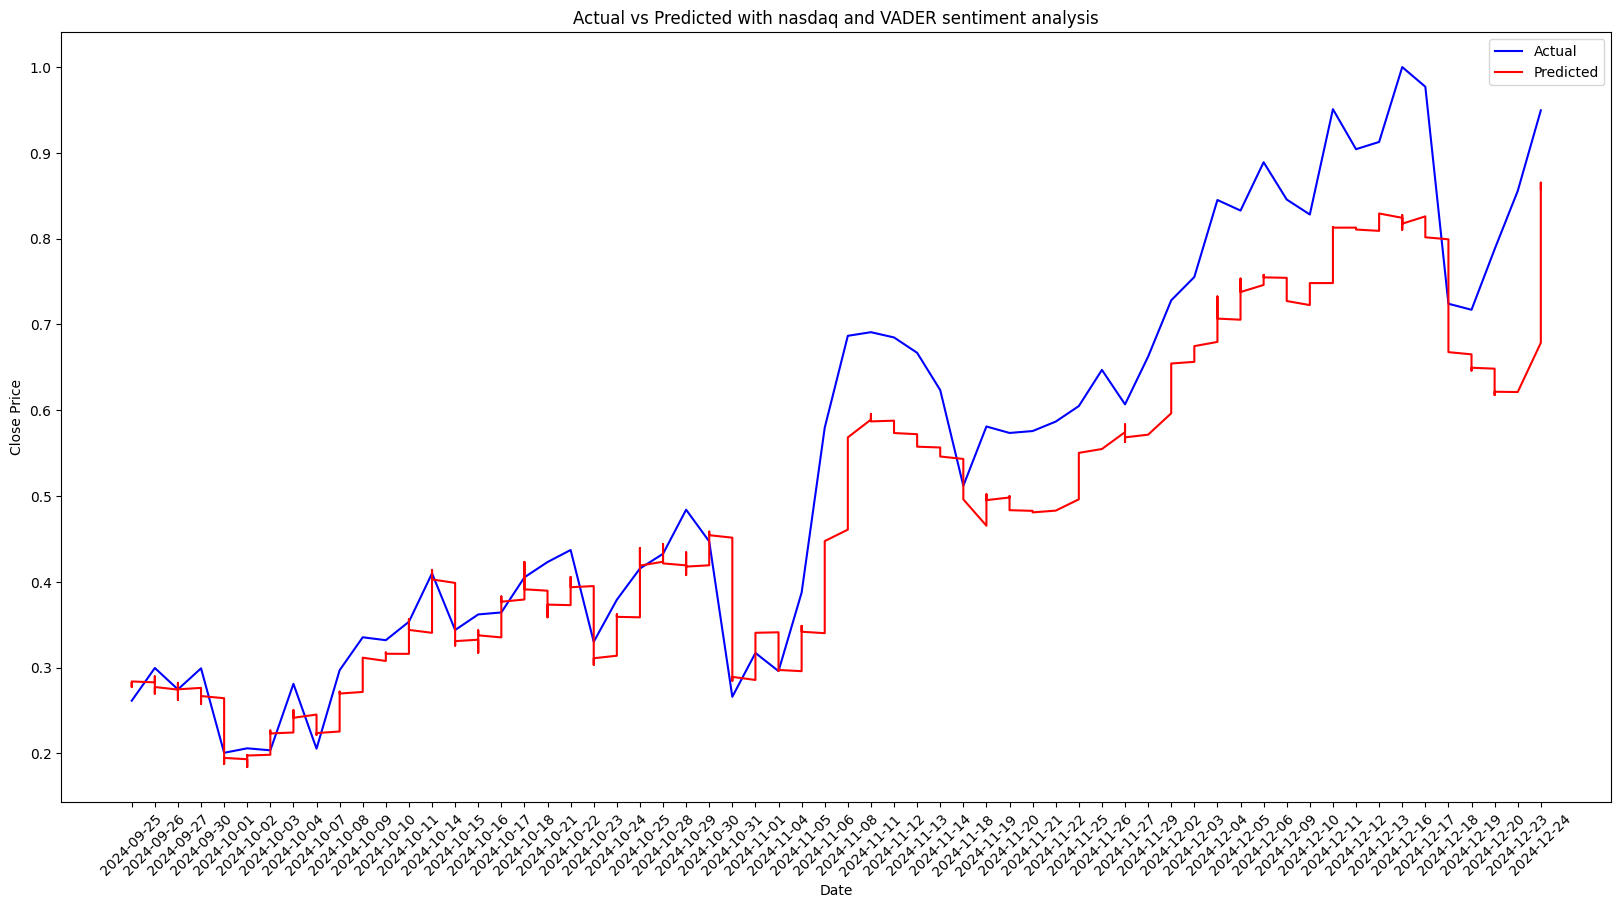

In [ ]:
import matplotlib.pyplot as plt

# 예측 수행
y_pred = model.predict(X_test)

# 예측 결과와 실제 결과를 데이터프레임으로 변환
results = pd.DataFrame({
    'Date': day_test,  # 날짜 정보
    'Actual': y_test,
    'Predicted': y_pred.flatten()  # 예측 결과
})

# 시각화
plt.figure(figsize=(20, 10))
plt.plot(results['Date'], results['Actual'], label='Actual', color='blue')
plt.plot(results['Date'], results['Predicted'], label='Predicted', color='red')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted with nasdaq and VADER sentiment analysis')
plt.legend()
plt.show()

### RoBERTa sentiment analysis 활용

In [122]:
X, y, day_seq = create_sequences(df[roberta].values, df['Close'].values, df['day'].values, sequence_length)

# 데이터셋 분리: 훈련 + 검증 데이터와 테스트 데이터로 나누기
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# 훈련 데이터와 검증 데이터로 다시 분리
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42, shuffle=False)

# day_seq도 동일하게 분리
day_train_val, day_test = train_test_split(df['day'].values[sequence_length:], test_size=0.2, random_state=42, shuffle=False)
day_train, day_val = train_test_split(day_train_val, test_size=0.2, random_state=42, shuffle=False)

In [123]:
from keras.callbacks import EarlyStopping

# 조기 종료 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# 하이퍼파라미터 탐색
tuner_bi.search(X_train, y_train,
                epochs=20,
                validation_data=(X_test, y_test),
                callbacks=[early_stopping],
                batch_size=32)

# 최적의 하이퍼파라미터 가져오기
best_hyperparameters = tuner_bi.get_best_hyperparameters(num_trials=1)[0]

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:")
for hp, value in best_hyperparameters.values.items():
    print(f"{hp}: {value}")

# Bi-GRU 모델 -> 최적의 파라미터로 수정
model = Sequential([
    Bidirectional(GRU(best_hyperparameters.get('units_1'), return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))),
    Dropout(0.2),
    Bidirectional(GRU(best_hyperparameters.get('units_2'))),
    Dropout(0.2),
    Dense(1)
])

# 모델 컴파일
optimizer_name = best_hyperparameters.get('optimizer')
learning_rate = best_hyperparameters.get('learning_rate')

if optimizer_name == 'adam':
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
else:
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# 모델 학습
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

# 모델 평가
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.3f}, Test MAE: {test_mae:.3f}")

최적의 하이퍼파라미터:
units_1: 64
units_2: 96
learning_rate: 0.001
optimizer: adam
tuner/epochs: 20
tuner/initial_epoch: 7
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0020
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


111/111 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 0.0403 - mae: 0.1341 - val_loss: 0.0025 - val_mae: 0.0380
Epoch 2/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0044 - mae: 0.0523 - val_loss: 0.0022 - val_mae: 0.0349
Epoch 3/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0035 - mae: 0.0459 - val_loss: 0.0024 - val_mae: 0.0395
Epoch 4/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0031 - mae: 0.0433 - val_loss: 0.0019 - val_mae: 0.0321
Epoch 5/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0025 - mae: 0.0386 - val_loss: 0.0033 - val_mae: 0.0428
Epoch 6/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0024 - mae: 0.0372 - val_loss: 0.0019 - val_mae: 0.0312
Epoch 7/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0022 - mae: 0.0354 - val_loss: 0.0032 - val_mae: 0.0419
Epoch 8/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0020 - mae: 0.0336 - val_loss: 0.0023 - val_mae: 0.0338
Epoch 9/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss

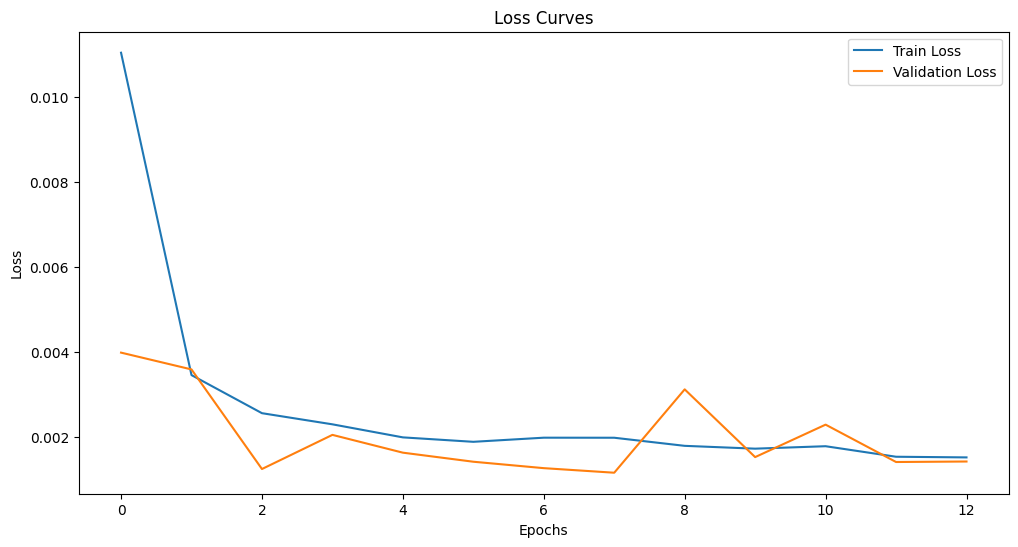

In [ ]:
import matplotlib.pyplot as plt

# 손실 시각화
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

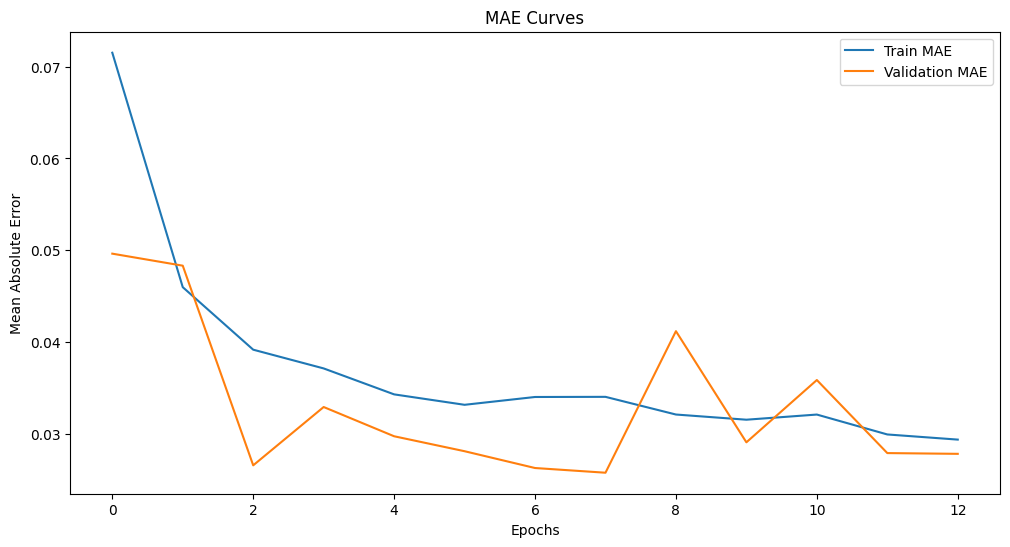

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE Curves')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


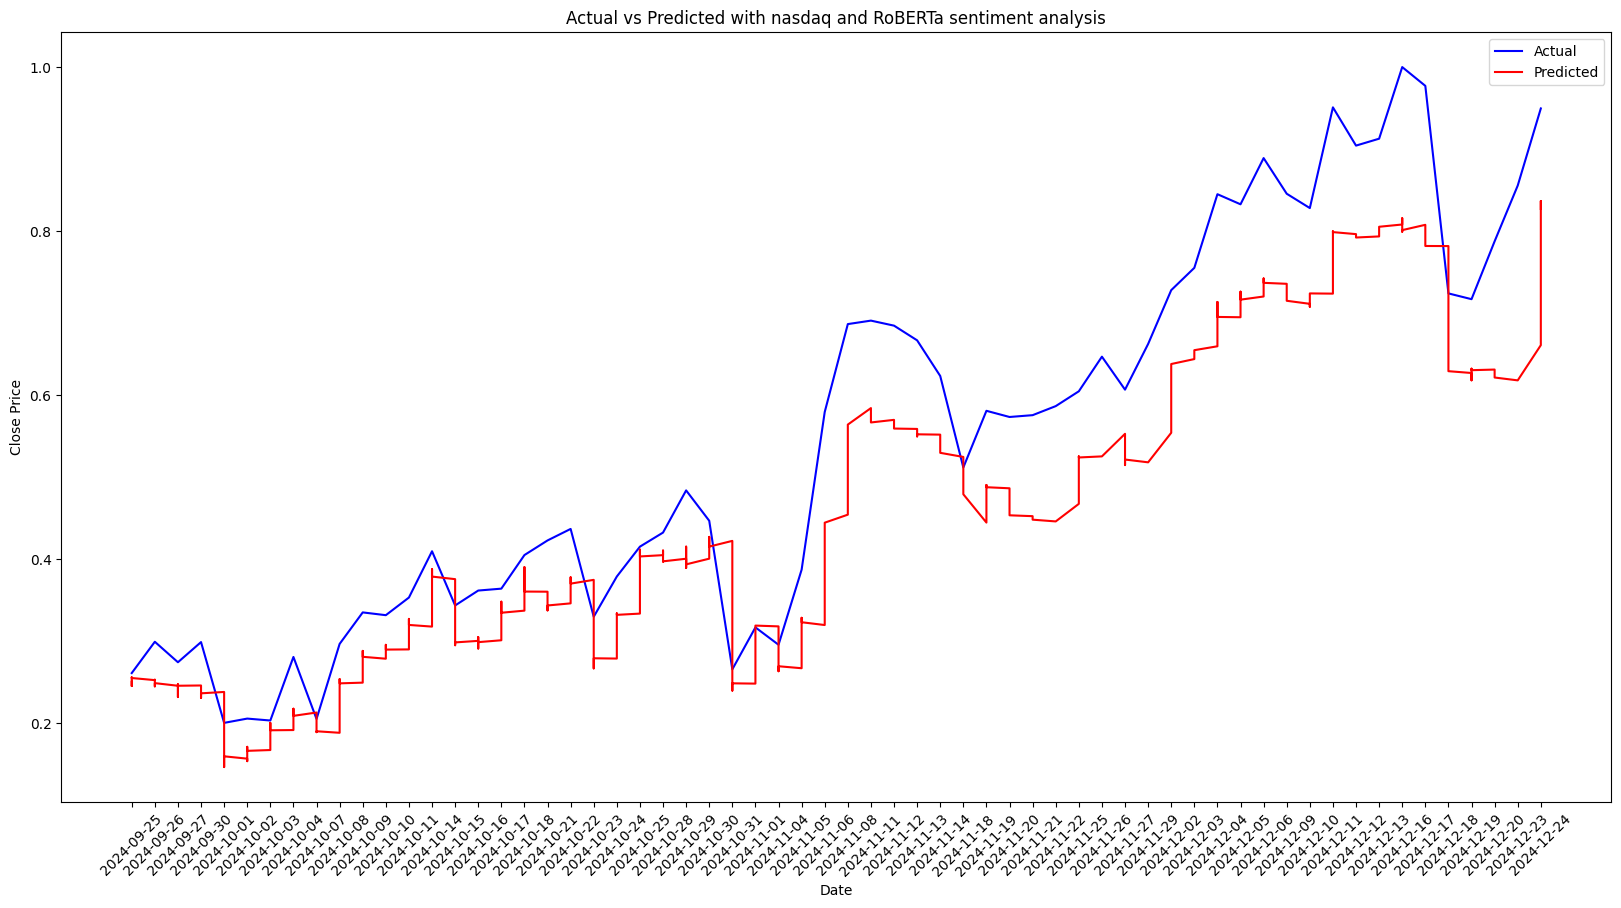

In [ ]:
import matplotlib.pyplot as plt

# 예측 수행
y_pred = model.predict(X_test)

# 예측 결과와 실제 결과를 데이터프레임으로 변환
results = pd.DataFrame({
    'Date': day_test,  # 날짜 정보
    'Actual': y_test,
    'Predicted': y_pred.flatten()  # 예측 결과
})

# 시각화
plt.figure(figsize=(20, 10))
plt.plot(results['Date'], results['Actual'], label='Actual', color='blue')
plt.plot(results['Date'], results['Predicted'], label='Predicted', color='red')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted with nasdaq and RoBERTa sentiment analysis')
plt.legend()
plt.show()

### VADER + RoBERTa sentiment analysis 활용

In [124]:
X, y, day_seq = create_sequences(df[total].values, df['Close'].values, df['day'].values, sequence_length)

# 데이터셋 분리: 훈련 + 검증 데이터와 테스트 데이터로 나누기
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# 훈련 데이터와 검증 데이터로 다시 분리
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42, shuffle=False)

# day_seq도 동일하게 분리
day_train_val, day_test = train_test_split(df['day'].values[sequence_length:], test_size=0.2, random_state=42, shuffle=False)
day_train, day_val = train_test_split(day_train_val, test_size=0.2, random_state=42, shuffle=False)

In [125]:
from keras.callbacks import EarlyStopping

# 조기 종료 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# 하이퍼파라미터 탐색
tuner_bi.search(X_train, y_train,
                epochs=20,
                validation_data=(X_test, y_test),
                callbacks=[early_stopping],
                batch_size=32)

# 최적의 하이퍼파라미터 가져오기
best_hyperparameters = tuner_bi.get_best_hyperparameters(num_trials=1)[0]

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:")
for hp, value in best_hyperparameters.values.items():
    print(f"{hp}: {value}")

# Bi-GRU 모델 -> 최적의 파라미터로 수정
model = Sequential([
    Bidirectional(GRU(best_hyperparameters.get('units_1'), return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))),
    Dropout(0.2),
    Bidirectional(GRU(best_hyperparameters.get('units_2'))),
    Dropout(0.2),
    Dense(1)
])

# 모델 컴파일
optimizer_name = best_hyperparameters.get('optimizer')
learning_rate = best_hyperparameters.get('learning_rate')

if optimizer_name == 'adam':
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
else:
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# 모델 학습
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

# 모델 평가
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.3f}, Test MAE: {test_mae:.3f}")

최적의 하이퍼파라미터:
units_1: 64
units_2: 96
learning_rate: 0.001
optimizer: adam
tuner/epochs: 20
tuner/initial_epoch: 7
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0020
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


111/111 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0259 - mae: 0.1064 - val_loss: 0.0031 - val_mae: 0.0405
Epoch 2/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0038 - mae: 0.0476 - val_loss: 0.0030 - val_mae: 0.0404
Epoch 3/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0029 - mae: 0.0413 - val_loss: 0.0020 - val_mae: 0.0319
Epoch 4/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0025 - mae: 0.0383 - val_loss: 0.0035 - val_mae: 0.0409
Epoch 5/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0023 - mae: 0.0374 - val_loss: 0.0014 - val_mae: 0.0277
Epoch 6/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0021 - mae: 0.0348 - val_loss: 0.0016 - val_mae: 0.0292
Epoch 7/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0022 - mae: 0.0352 - val_loss: 0.0017 - val_mae: 0.0303
Epoch 8/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0020 - mae: 0.0342 - val_loss: 0.0030 - val_mae: 0.0392
Epoch 9/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


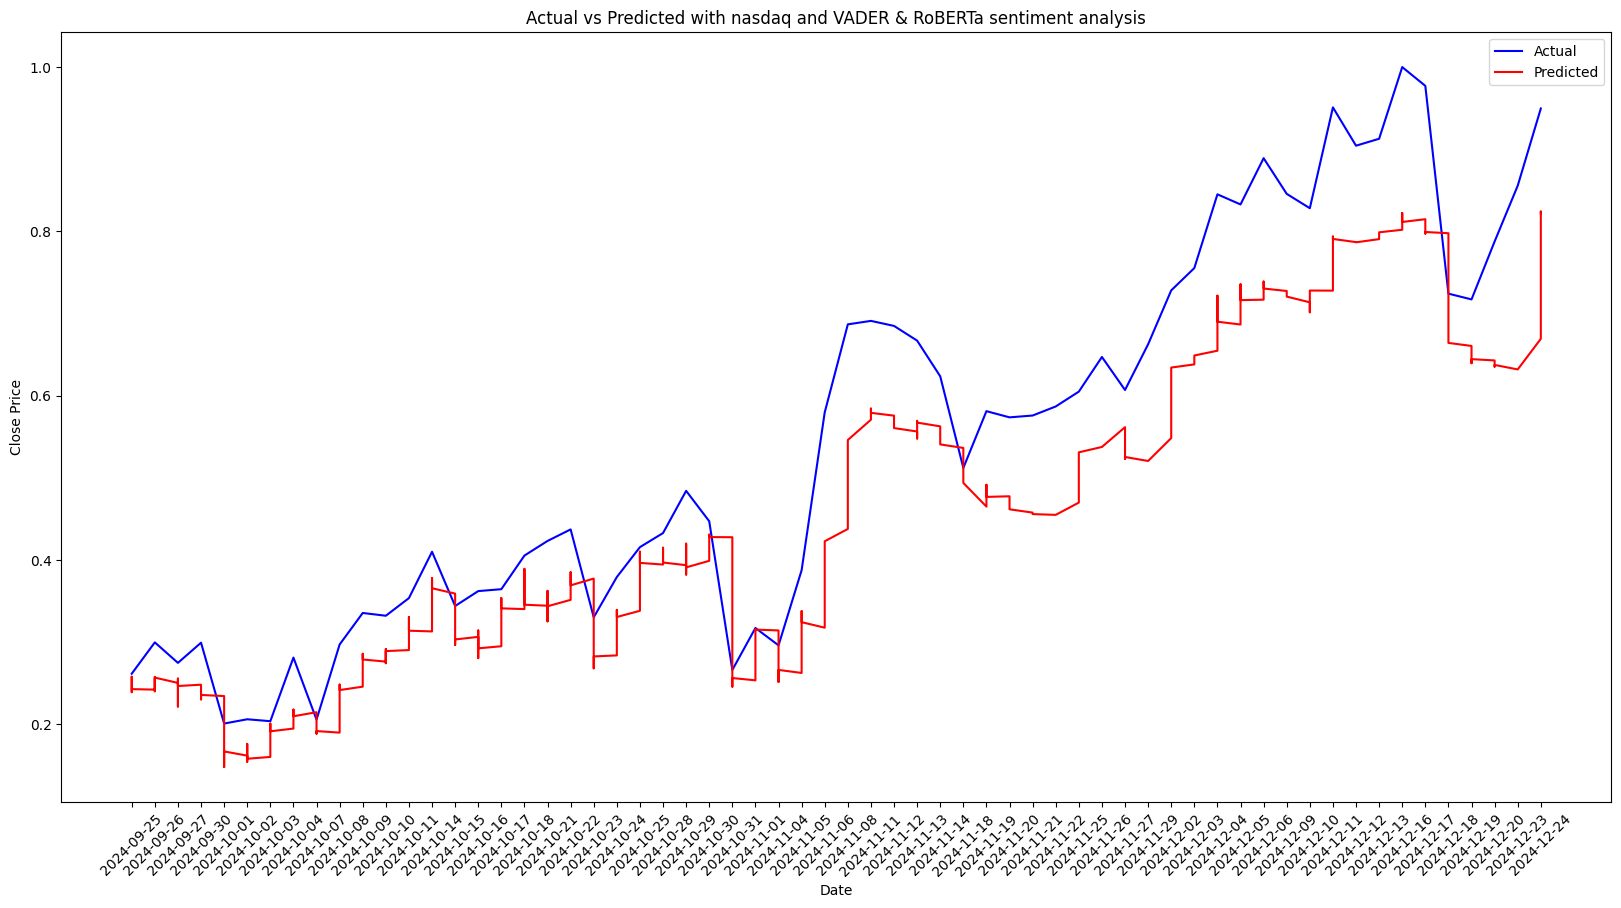

In [ ]:
import matplotlib.pyplot as plt

# 예측 수행
y_pred = model.predict(X_test)

# 예측 결과와 실제 결과를 데이터프레임으로 변환
results = pd.DataFrame({
    'Date': day_test,  # 날짜 정보
    'Actual': y_test,
    'Predicted': y_pred.flatten()  # 예측 결과
})

# 시각화
plt.figure(figsize=(20, 10))
plt.plot(results['Date'], results['Actual'], label='Actual', color='blue')
plt.plot(results['Date'], results['Predicted'], label='Predicted', color='red')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted with nasdaq and VADER & RoBERTa sentiment analysis')
plt.legend()
plt.show()